In [1]:
#install.packages("devtools")     # only need to do this once
#devtools::install_github("nickpoison/astsa")
#install.packages("astsa")
#library(astsa)
#options(repr.plot.width=10, repr.plot.height=7) #ajusta tamaño de graficas

Installing package into 'C:/Users/jpmunoz/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'digest', 'jsonlite'



package 'digest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'digest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\jpmunoz\Documents\R\win-library\3.6\00LOCK\digest\libs\x64\digest.dll  a C:\Users\jpmunoz\Documents\R\win-library\3.6\digest\libs\x64\digest.dll: Permission denied"Warning message:
"restored 'digest'"

package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\jpmunoz\Documents\R\win-library\3.6\00LOCK\jsonlite\libs\x64\jsonlite.dll  a C:\Users\jpmunoz\Documents\R\win-library\3.6\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jpmunoz\AppData\Local\Temp\RtmpoNuZKl\downloaded_packages



Please download and install Rtools custom from https://cran.r-project.org/bin/windows/Rtools/.

Please download and install Rtools custom from https://cran.r-project.org/bin/windows/Rtools/.


v  checking for file 'C:\Users\jpmunoz\AppData\Local\Temp\RtmpoNuZKl\remotes68187de33ce1\nickpoison-astsa-a252531/DESCRIPTION' (385ms)
-  preparing 'astsa': (511ms)
v  checking DESCRIPTION meta-information ...
-  checking for LF line-endings in source and make files and shell scripts (548ms)
-  checking for empty or unneeded directories
-  looking to see if a 'data/datalist' file should be added
-  building 'astsa_1.10.tar.gz'
   


Installing package into 'C:/Users/jpmunoz/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Installing package into 'C:/Users/jpmunoz/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'astsa' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jpmunoz\AppData\Local\Temp\RtmpoNuZKl\downloaded_packages


Warning message:
"package 'astsa' was built under R version 3.6.3"

#### Ejercicio1

1. (ej. 2.9) Mejorar el ajuste del periodograma anteior a la serie SOI ajustando previamente una tendencia y trabajando con los residuos. Encontrar las frecuencias básicas.

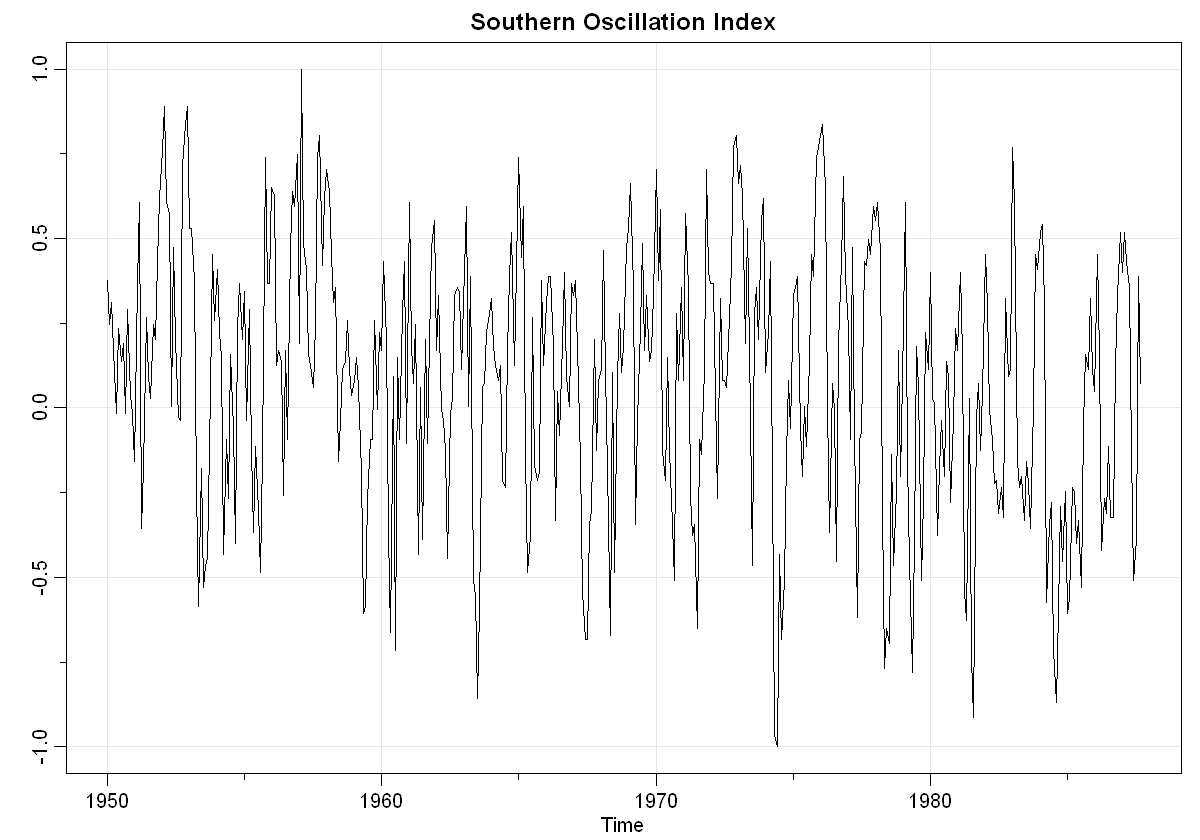

In [650]:
data_soi= soi
tsplot(data_soi, ylab="", main="Southern Oscillation Index")

In [651]:
#  Modelo 1
trend_soi = time(data_soi)        # time

fit = lm(data_soi ~  trend_soi, na.action=NULL) #Modelo de la recta
            
summary(fit)       # regression results

num_soi = length(trend_soi)                             # sample size
num_soi
AIC(fit)/num - log(2*pi)                                # AIC 
BIC(fit)/num - log(2*pi)                                # BIC 


Call:
lm(formula = data_soi ~ trend_soi, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04140 -0.24183  0.01935  0.27727  0.83866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.70367    3.18873   4.298 2.12e-05 ***
trend_soi   -0.00692    0.00162  -4.272 2.36e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3756 on 451 degrees of freedom
Multiple R-squared:  0.0389,	Adjusted R-squared:  0.03677 
F-statistic: 18.25 on 1 and 451 DF,  p-value: 2.359e-05


[1] 453

[1] -1.0456

[1] -1.021294

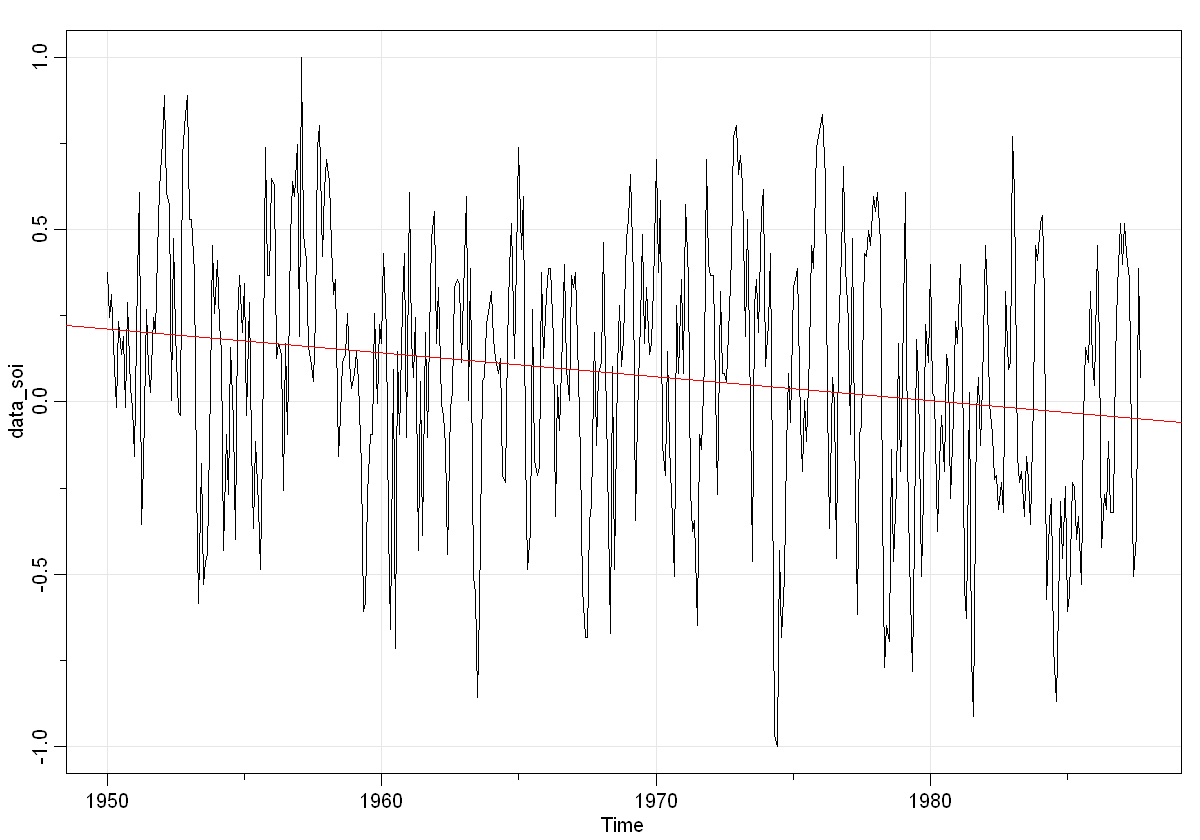

In [652]:
tsplot(data_soi)
abline(fit, col = 2)

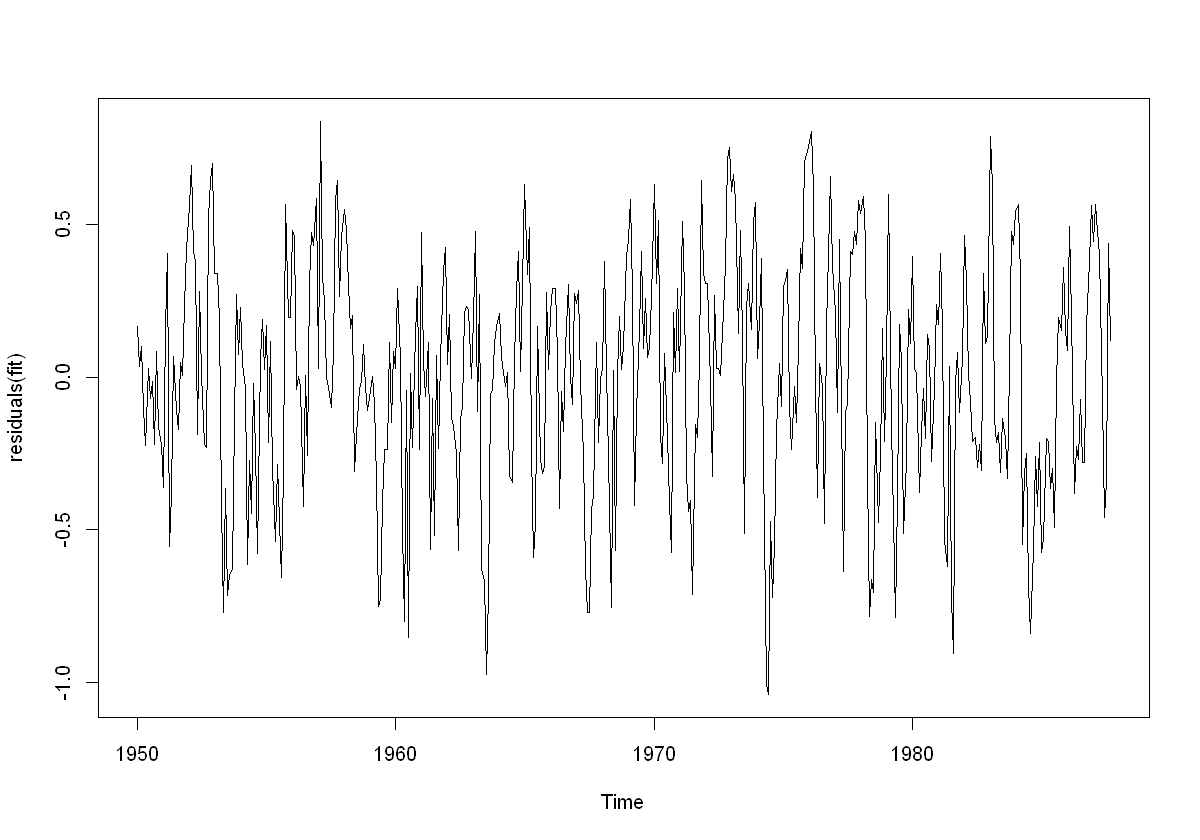

In [653]:
plot(residuals(fit))

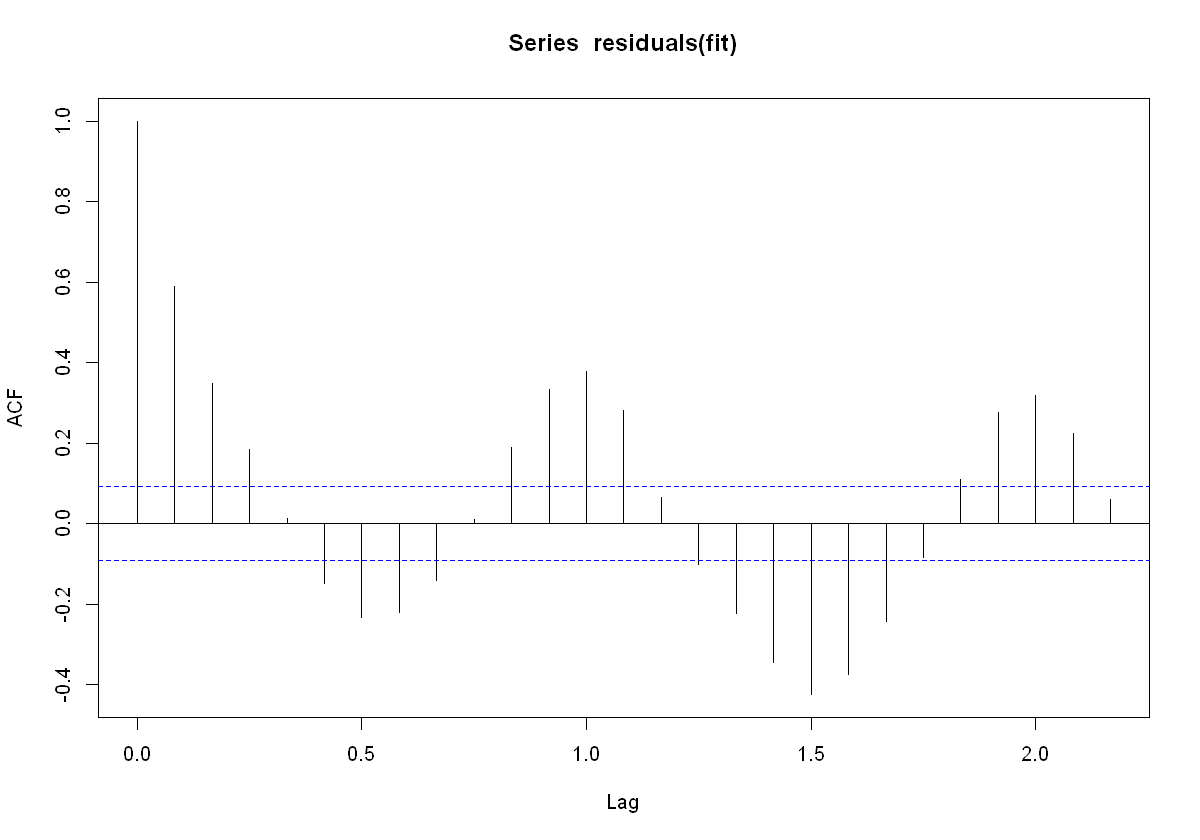

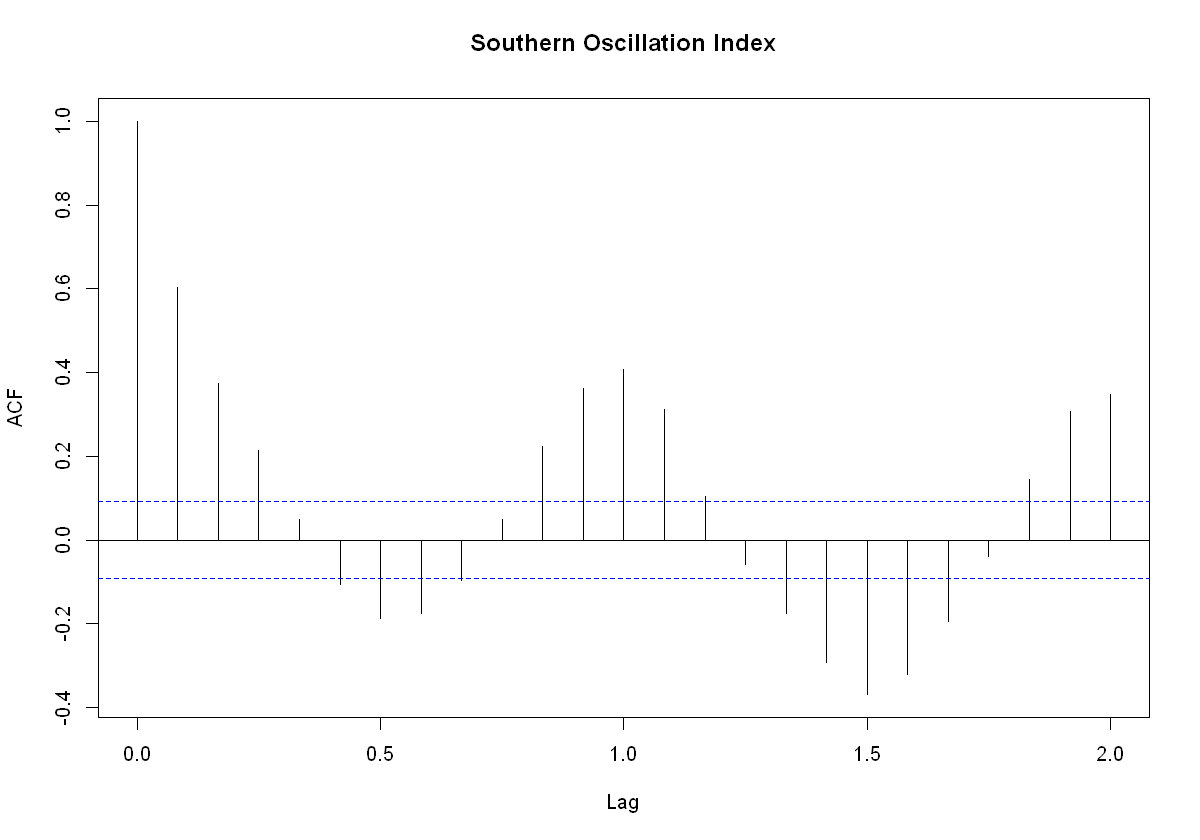

In [654]:
acf(residuals(fit))
acf(soi, 24, main="Southern Oscillation Index") #límitar en 24

$Observación:$
Con la autocorrelación de los datos de SOI observo una fuerte corelación cada 12 meses.

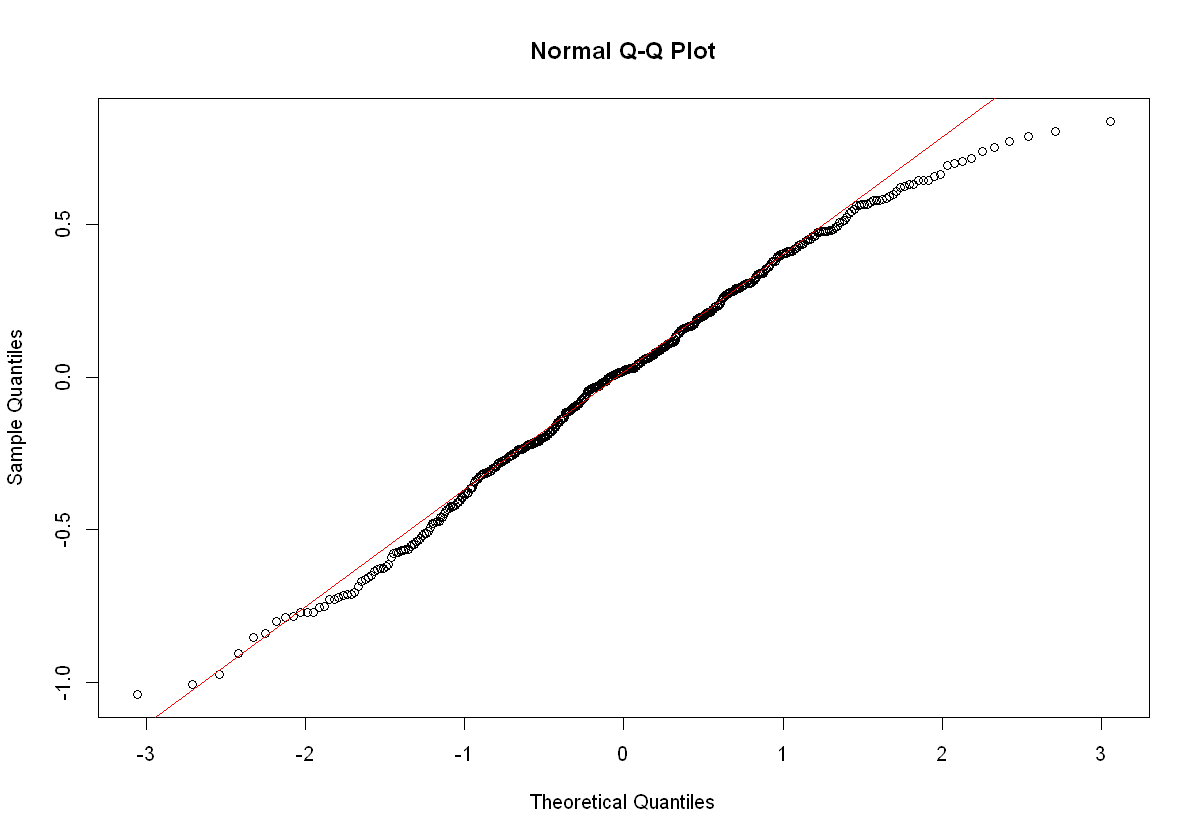

In [655]:
qqnorm(residuals(fit))
qqline(residuals(fit), col = 2)

#### Periodograma


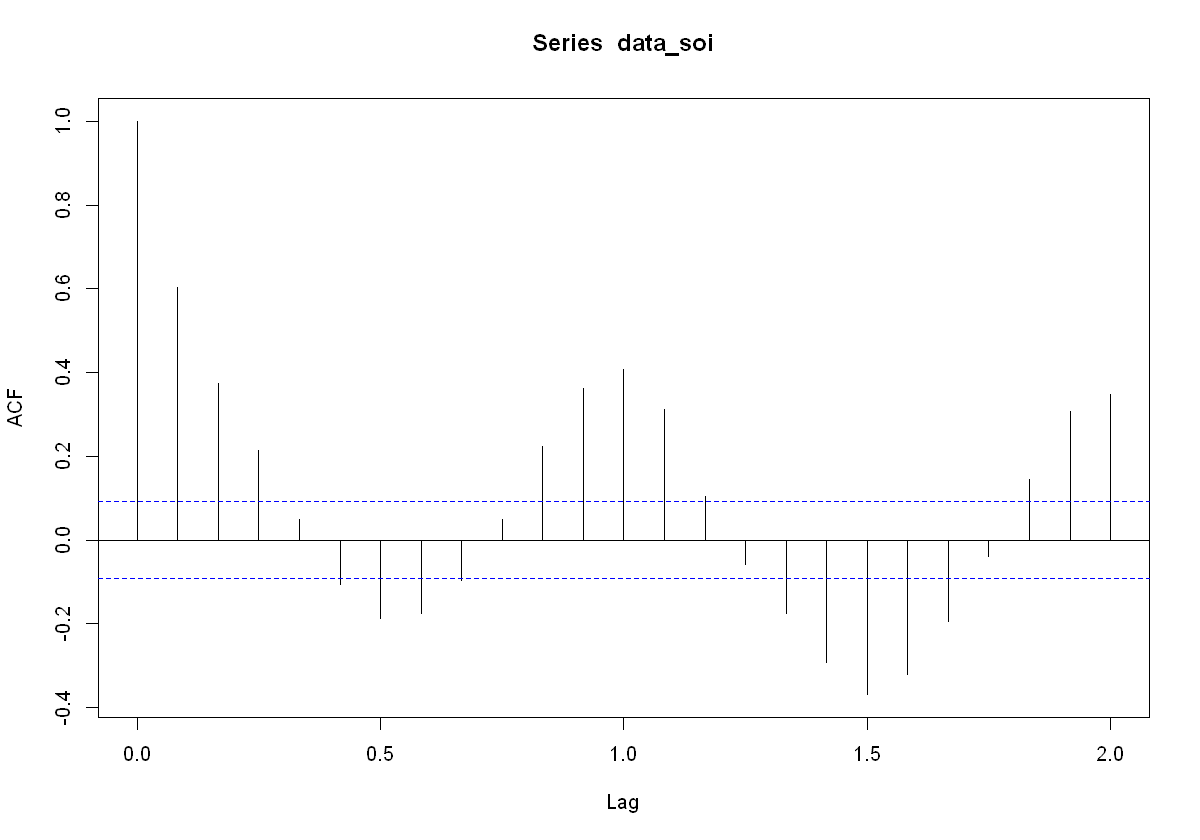

In [656]:
plot(acf(data_soi,lag.max=24))

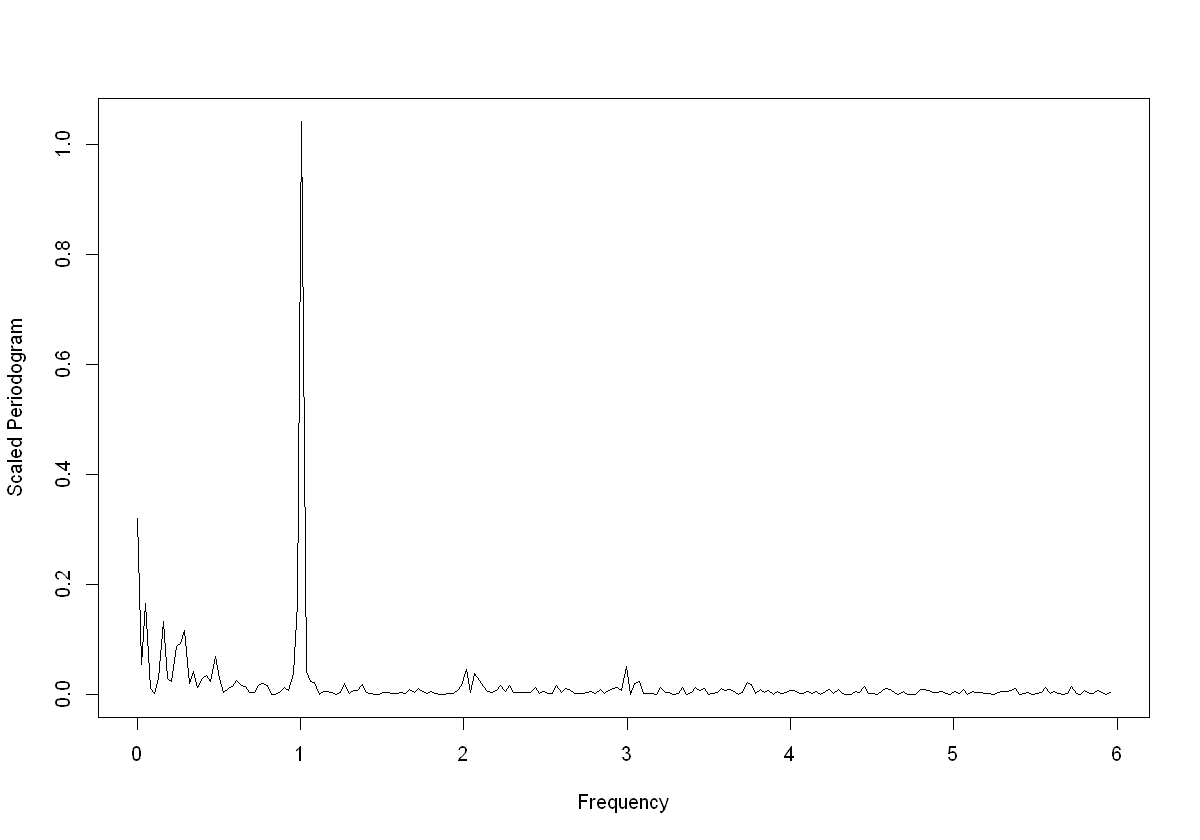

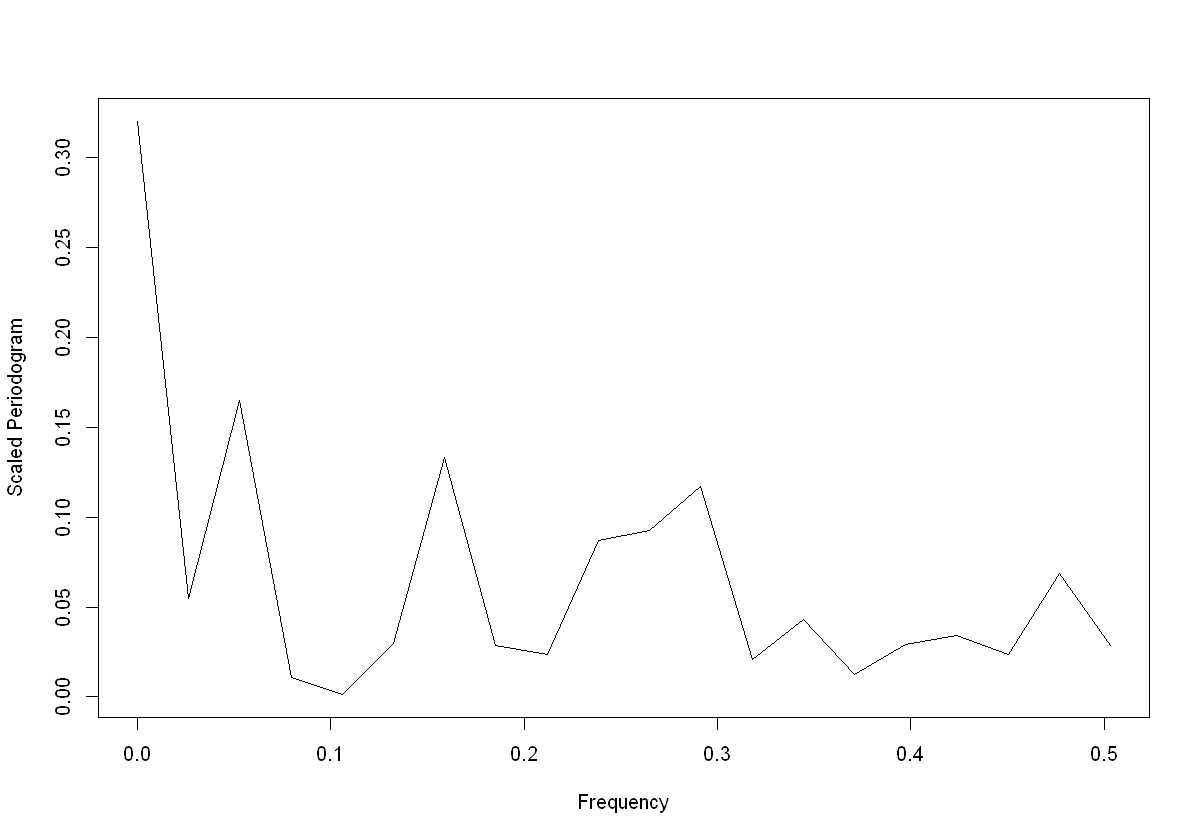

In [657]:
s = as.numeric(data_soi)
n = length(s)
I = abs(fft(s))^2/n # the periodogram
P = (50/n)*I[1:(n/2)] # the scaled periodogram
f = (0:(n/2-1))/n*12 # frequencies
plot(f, P, type="l", xlab="Frequency", ylab="Scaled Periodogram")
plot(f[1:20], P[1:20], type="l", xlab="Frequency", ylab="Scaled Periodogram")

In [658]:
data_soi_lag_2 = lag(data_soi,-2)
data_soi_lag_12 = lag(data_soi,-12)
data_soi_lag_24 = lag(data_soi,-24)
data_soi_lag_36 = lag(data_soi,-36)
data_soi_lag_48 = lag(data_soi,-48)

In [659]:
fish = ts.intersect(data_soi, data_soi_lag_2, data_soi_lag_12, data_soi_lag_24, data_soi_lag_36, data_soi_lag_48, dframe=TRUE)

Se propone un modelo:
$$x_t = \beta_0 + \beta_1 S_{t−12} + w_t.$$

In [660]:
head(fish)

data_soi,data_soi_lag_2,data_soi_lag_12,data_soi_lag_24,data_soi_lag_36,data_soi_lag_48
0.410,0.454,0.530,0.760,-0.158,0.377
0.224,0.257,0.530,0.891,0.366,0.246
0.148,0.410,0.377,0.607,0.607,0.311
-0.432,0.224,-0.235,0.574,-0.355,0.104
-0.093,0.148,-0.585,0.005,-0.180,-0.016
-0.268,-0.432,-0.180,0.475,0.268,0.235


In [661]:
fit_1 = lm(data_soi ~ 0 + data_soi_lag_2 + data_soi_lag_12 +  data_soi_lag_36 + data_soi_lag_48, data=fish, na.action=NULL )
summary(fit_1)


Call:
lm(formula = data_soi ~ 0 + data_soi_lag_2 + data_soi_lag_12 + 
    data_soi_lag_36 + data_soi_lag_48, data = fish, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03440 -0.19944  0.02019  0.22996  0.82476 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
data_soi_lag_2   0.23021    0.04153   5.543 5.40e-08 ***
data_soi_lag_12  0.18145    0.04561   3.979 8.23e-05 ***
data_soi_lag_36  0.20751    0.04487   4.624 5.08e-06 ***
data_soi_lag_48  0.23469    0.04738   4.954 1.07e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3071 on 401 degrees of freedom
Multiple R-squared:  0.3773,	Adjusted R-squared:  0.3711 
F-statistic: 60.75 on 4 and 401 DF,  p-value: < 2.2e-16


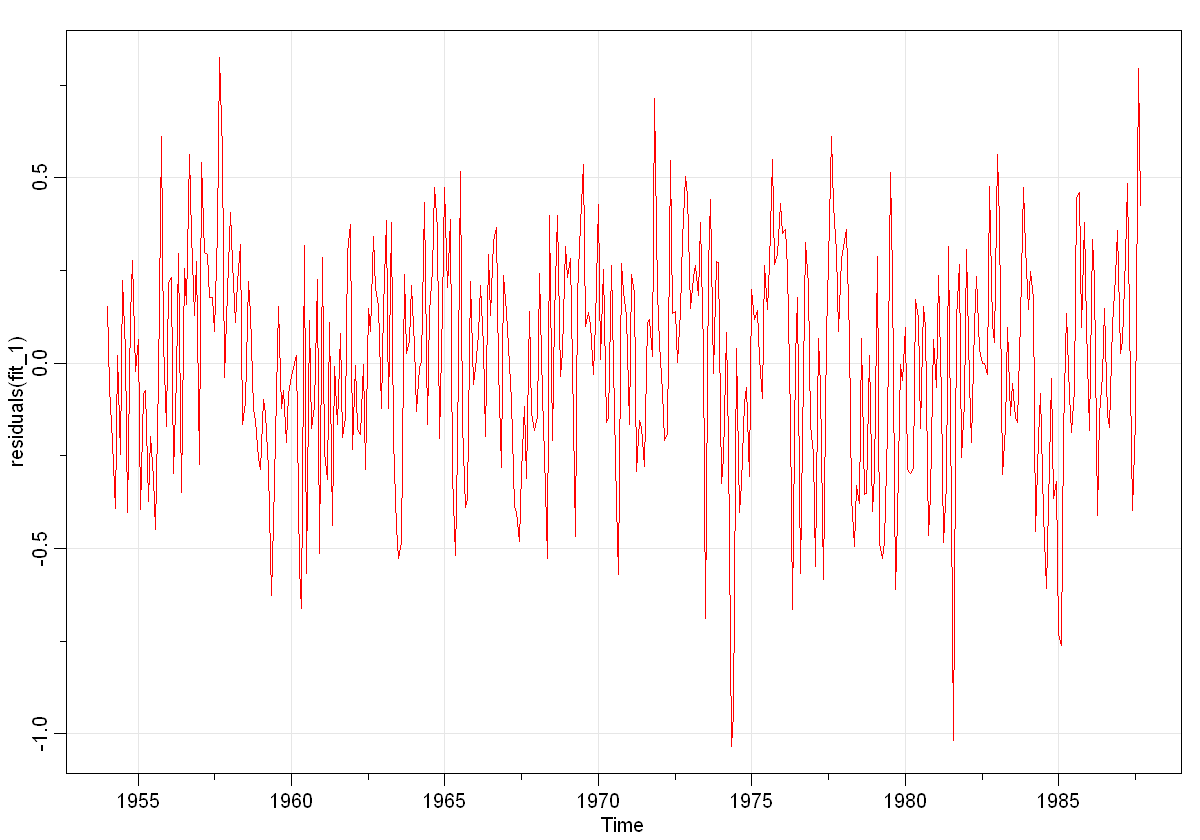

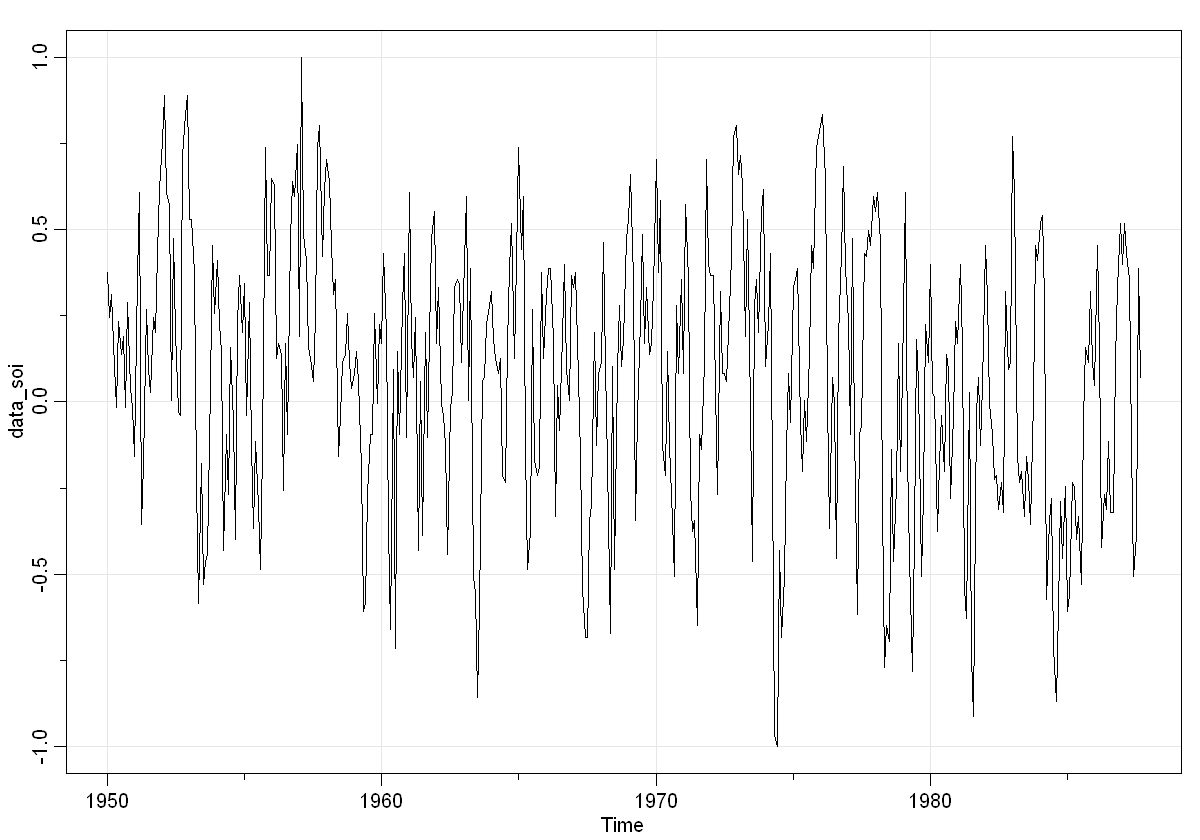

In [662]:
tsplot(residuals(fit_1), col = 2)
tsplot(data_soi)


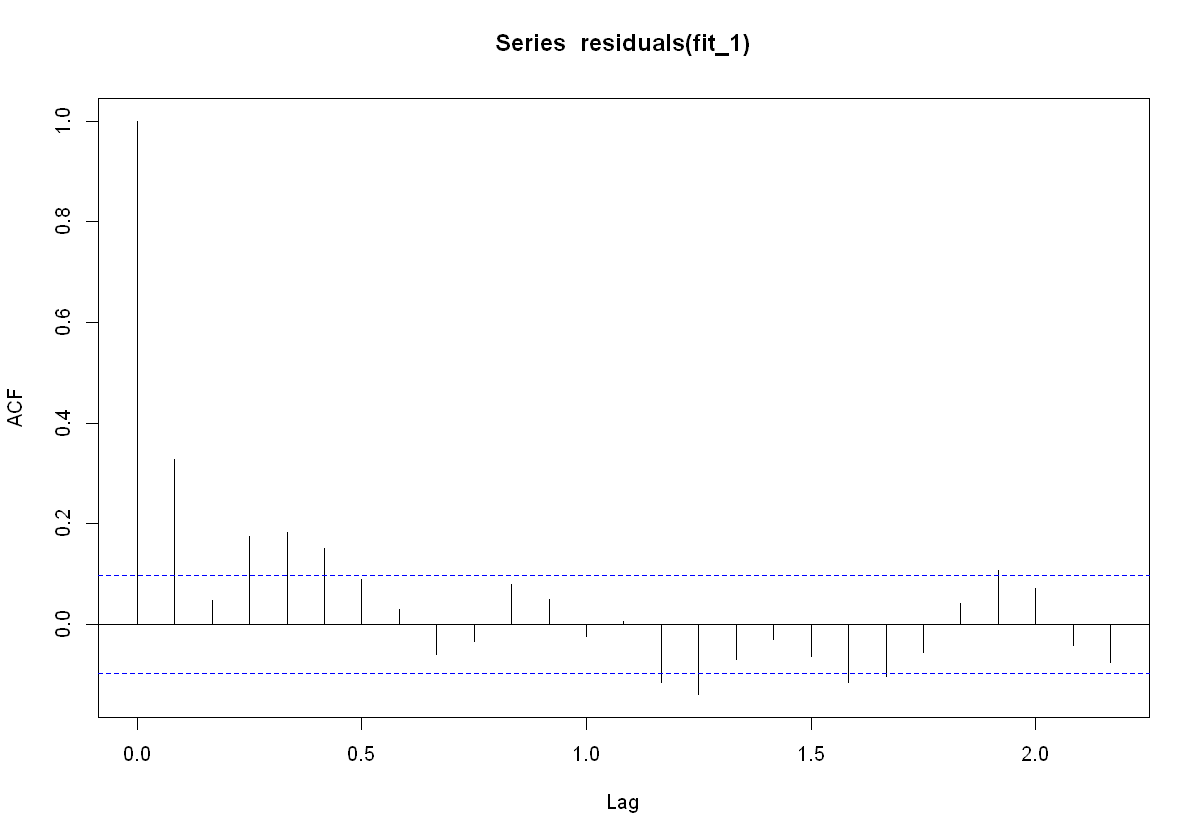

In [663]:
acf(residuals(fit_1))

In [664]:
"AIC:"
AIC(fit)/num - log(2*pi)                                # AIC 
AIC(fit_1)/num - log(2*pi)                                # AIC 

"BIC:"

BIC(fit)/num - log(2*pi)                                # BIC 
BIC(fit_1)/num - log(2*pi)                                # BIC 

[1] "AIC:"

[1] -1.0456

[1] -1.44611

[1] "BIC:"

[1] -1.021294

[1] -1.406702

#### Ejercicio 2
2. Discutir el ej. 2.10 del libro.

2.10 Consider the two weekly time series oil and gas. The oil series is in dollars per barrel, while the gas series is in cents per gallon.
(a) Plot the data on the same graph. Which of the simulated series displayed in
Section 1.2 do these series most resemble? Do you believe the series are stationary (explain your answer)?

(b) In economics, it is often the percentage change in price (termed growth rate or return), rather than the absolute price change, that is important. Argue that a transformation of the form yt = ∇ log xt might be applied to the data, where xt is the oil or gas price series. Hint: Recall Footnote 1.2. 

(c) Transform the data as described in part (b), plot the data on the same graph, look at the sample ACFs of the transformed data, and comment.  

(d) Plot the CCF of the transformed data and comment The small, but significant
values when gas leads oil might be considered as feedback.  

(e) Exhibit scatterplots of the oil and gas growth rate series for up to three weeks of lead time of oil prices; include a nonparametric smoother in each plot and comment on the results (e.g., Are there outliers? Are the relationships linear?).  

(f) There have been a number of studies questioning whether gasoline prices respond more quickly when oil prices are rising than when oil prices are falling (“asymmetry”). We will attempt to explore this question here with simple lagged regression; we will ignore some obvious problems such as outliers and autocorrelated errors, so this will not be a definitive analysis. Let Gt and Ot denote the gas and oil growth rates. 

(i) Fit the regression (and comment on the results)

Gt = α1 + α2It + β1Ot + β2Ot−1 + wt,

where It = 1 if Ot ≥ 0 and 0 otherwise (It is the indicator of no growth or
positive growth in oil price). Hint:

poil = diff(log(oil))

pgas = diff(log(gas))

indi = ifelse(poil < 0, 0, 1)

mess = ts.intersect(pgas, poil, poilL = lag(poil,-1), indi)

summary(fit <- lm(pgas~ poil + poilL + indi, data=mess))  


(ii) What is the fitted model when there is negative growth in oil price at time t? What is the fitted model when there is no or positive growth in oil price?  

Do these results support the asymmetry hypothesis?
(iii) Analyze the residuals from the fit and comment.


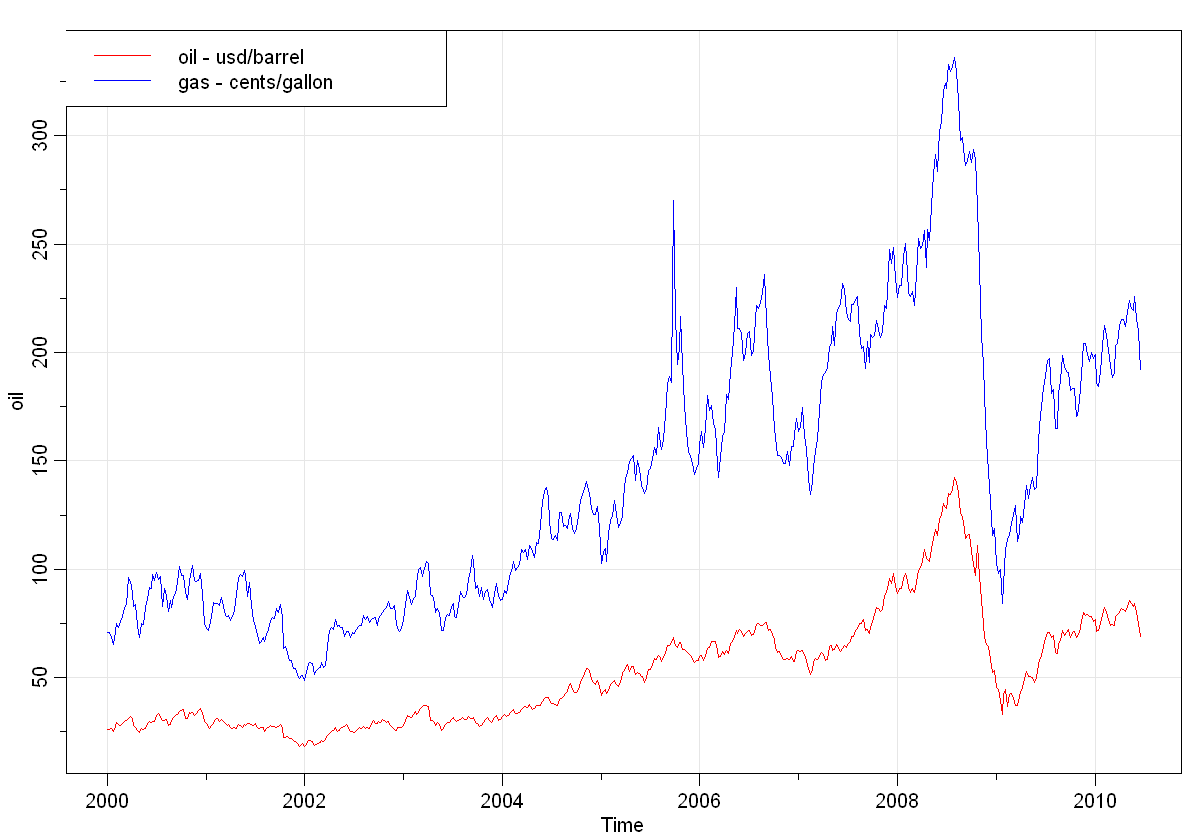

In [665]:
tsplot(oil,col= "red", ylim=(c(min(oil), max(gas))))
lines(gas, col="blue")
legend("topleft", c("oil - usd/barrel", "gas - cents/gallon"), col=c("red", "blue"), lty = c(1,1))

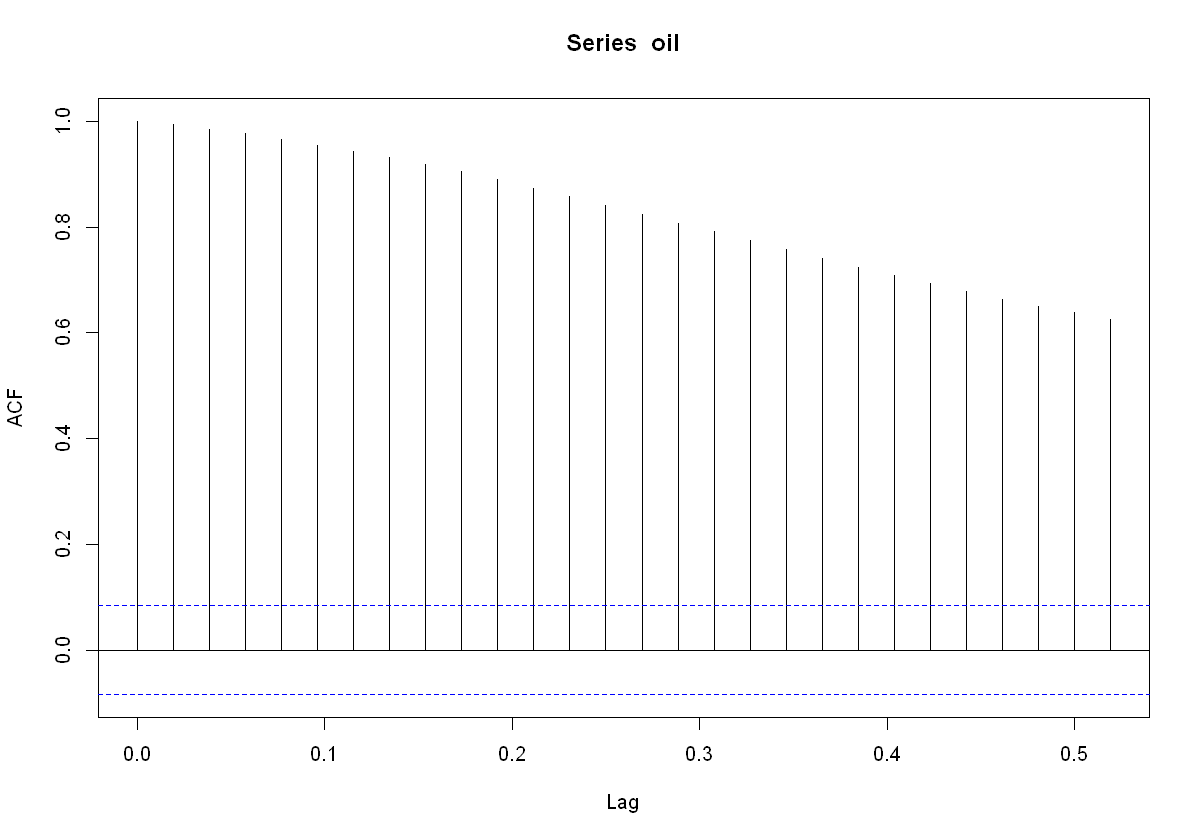

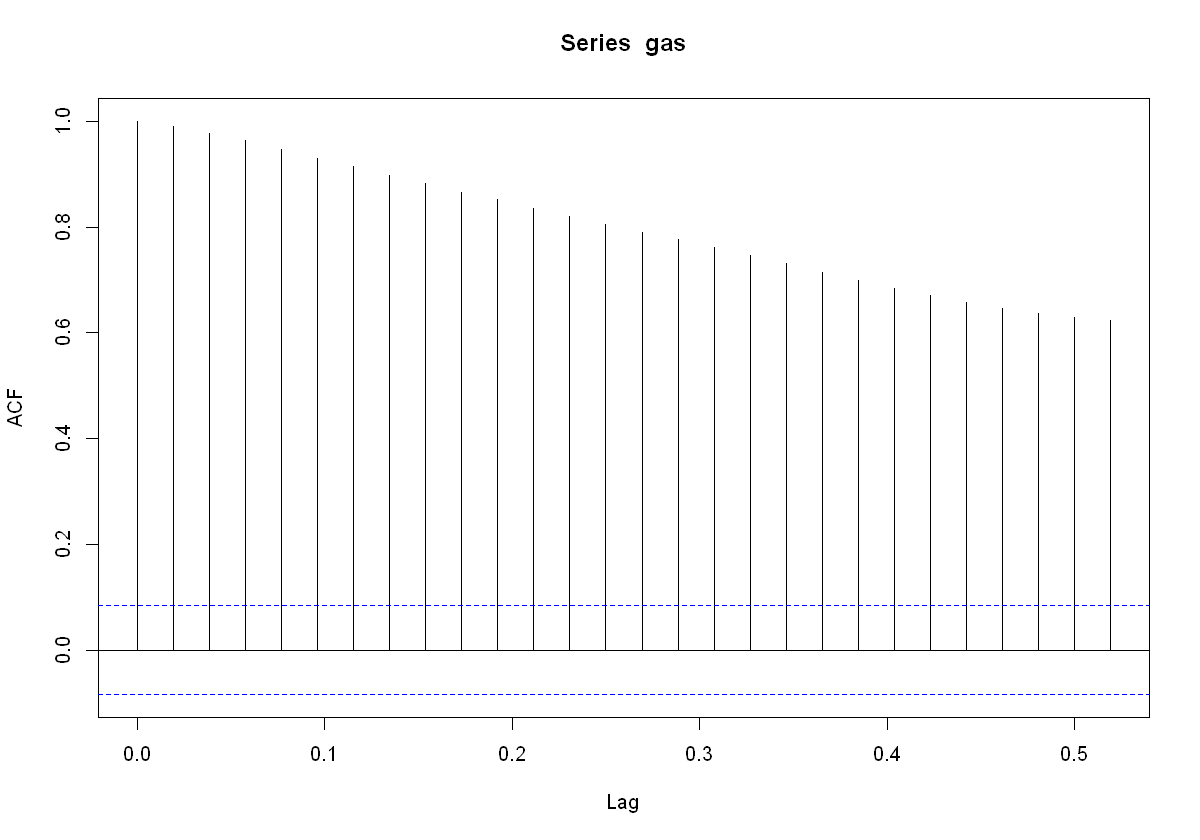

In [666]:
acf(oil)
acf(gas)

$$Observación:$$ Las series no tienen componentes estacionarios, se observa que van cambiando y evolucionando en el tiempo. Tienen tendencia a crecer. 

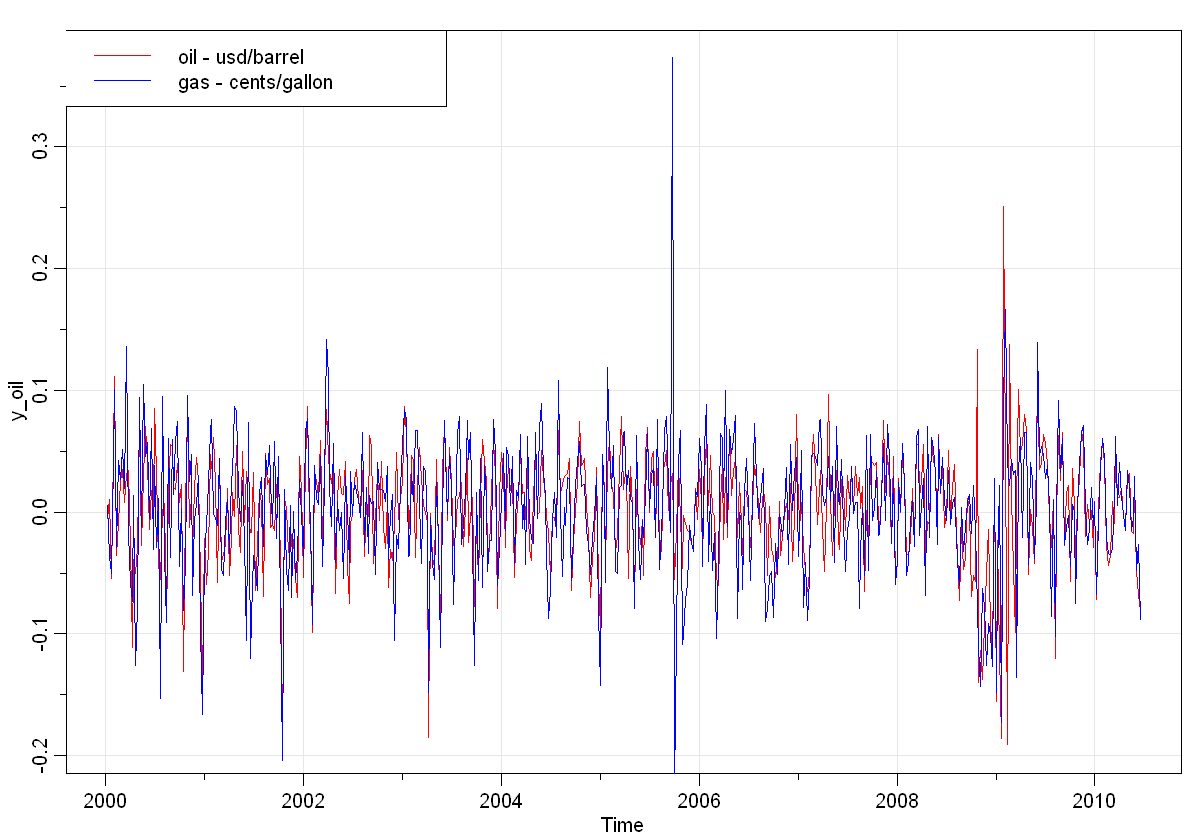

In [667]:
y_oil = diff(log(oil))
y_gas = diff(log(gas))
tsplot(y_oil,col= "red", ylim=(c(min(y_oil), max(y_gas))))
lines(y_gas, col="blue")
legend("topleft", c("oil - usd/barrel", "gas - cents/gallon"), col=c("red", "blue"), lty = c(1,1))

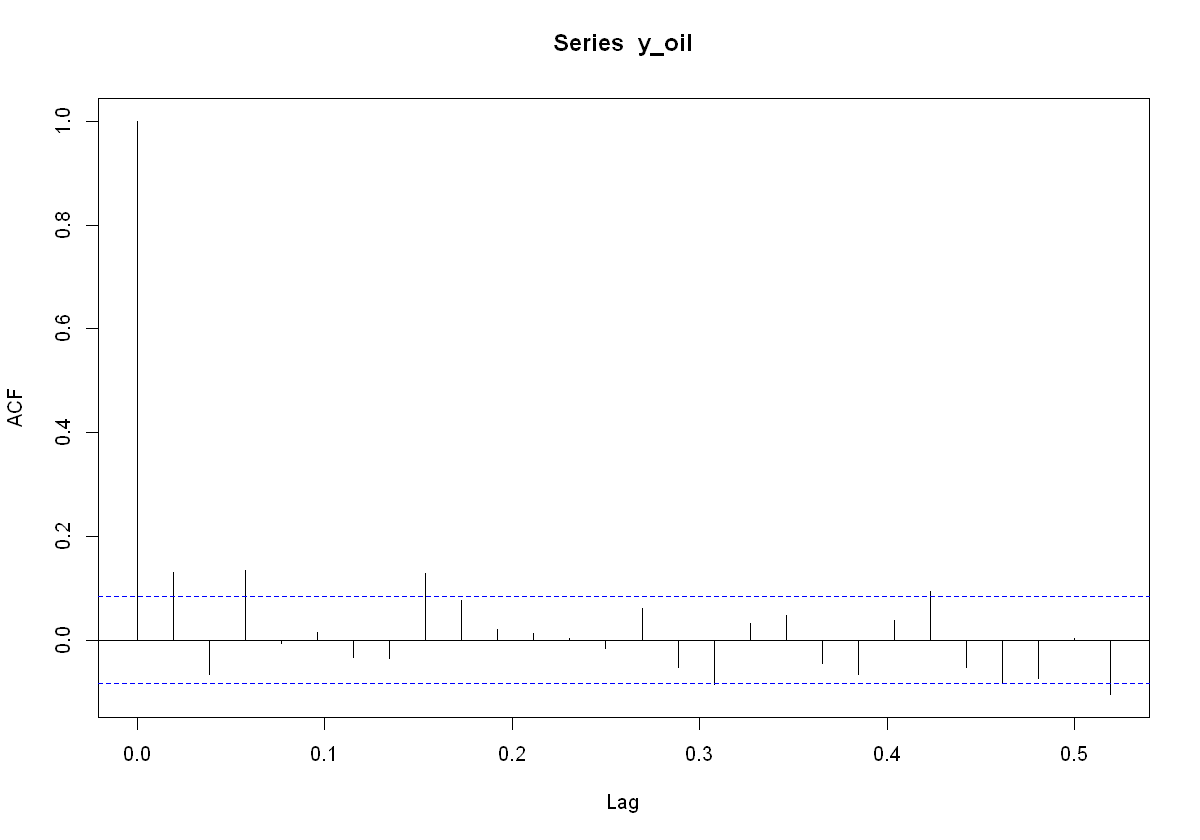

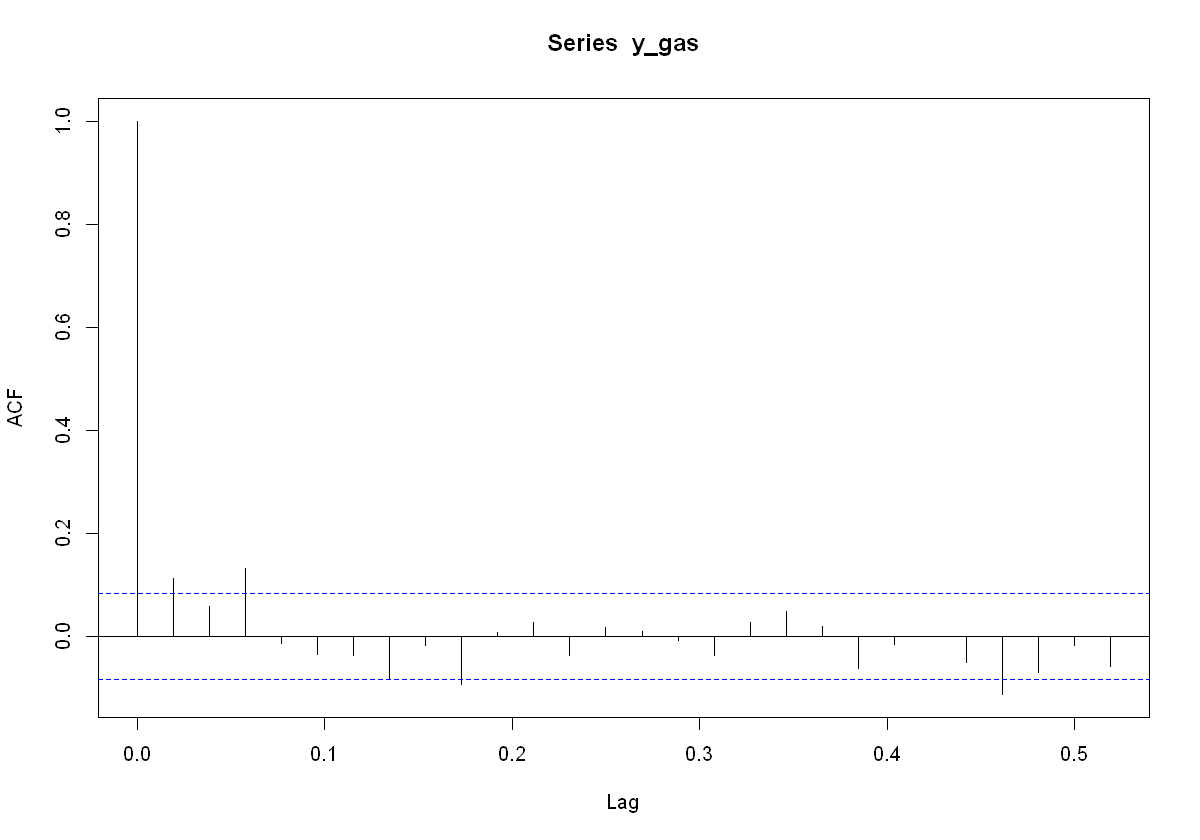

In [668]:
acf(y_oil)
acf(y_gas)

$$Observación:$$ Al aplicar el cambio porcentual en el precio del petroleo y el gas, le casamos esa estacionareidad. Luego de observar los resultados del acf, nos aproximamos a un ruido blanco gaussiano puro.

Despues de esto se encuentra parecido a la serie del Dow Jones de la sección 1.2

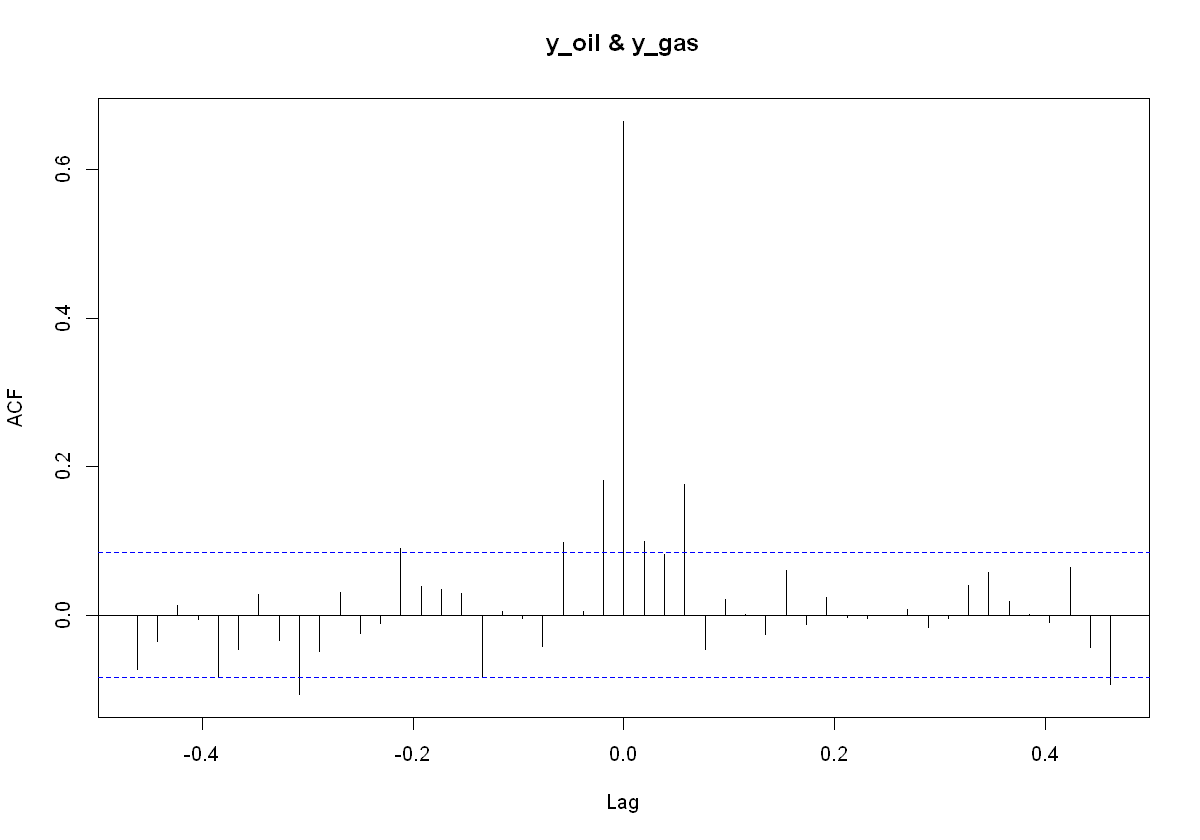

In [669]:
ccf(y_oil, y_gas,)

$$Observación:$$ Al aplicar la función de correlación cruzada, se observa que existe una fuerte correlación entre el gas y el petroleo, pero además existe una correlación bastante alta en algunos Lags positivos y negativos. 
Se observa que una semana anterior y 3 semanas anteriores del valor del petroleo pueden informar variaciones en el precio del Gas. 




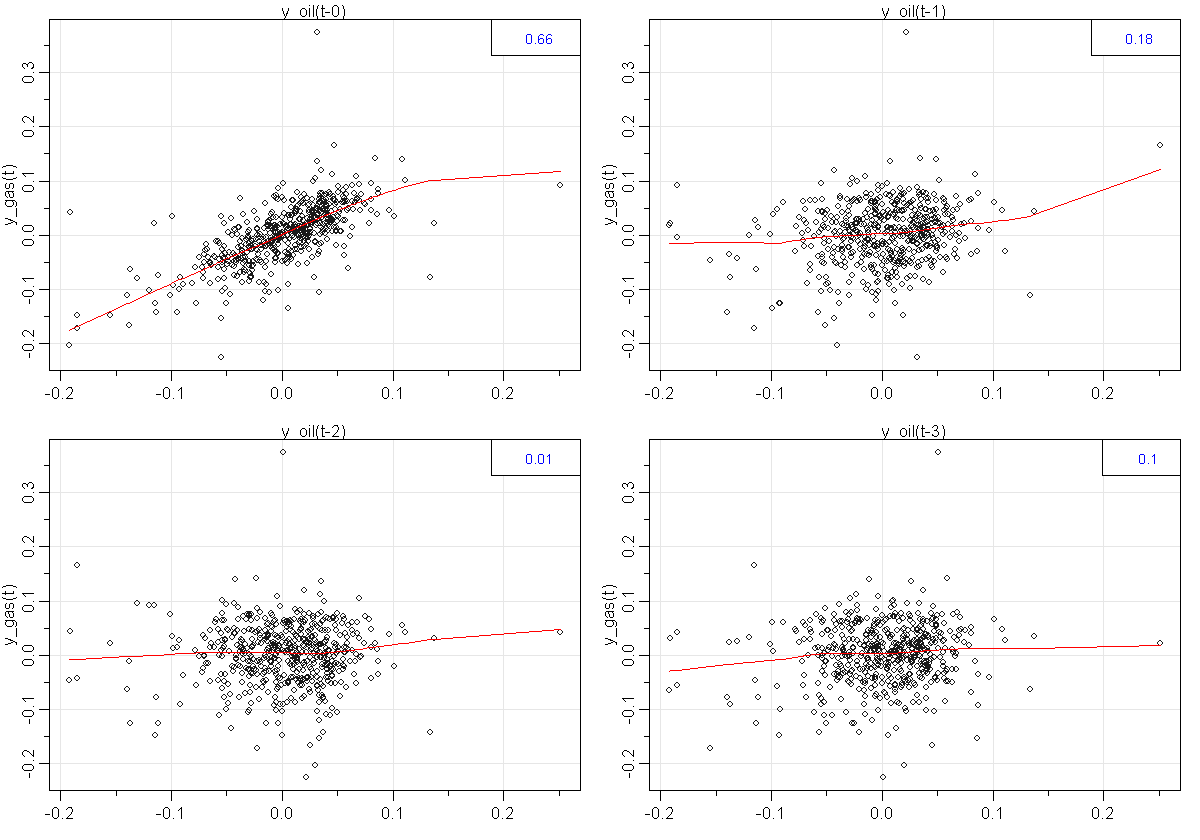

In [670]:
lag2.plot(y_oil, y_gas, 3)

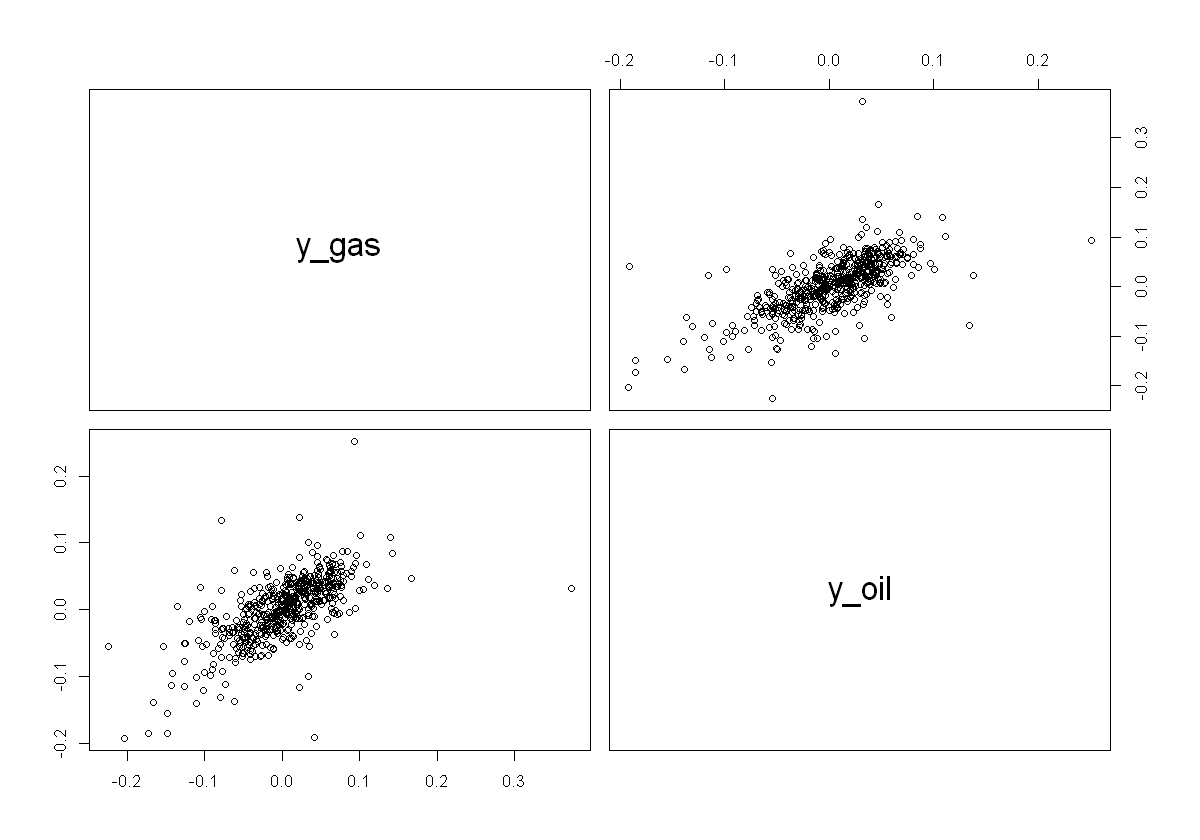

In [671]:
pairs(y_gas ~ y_oil)

$$Observación:$$ Se observa que existe correlación entre las dos series, y a su vez se puede obervaaar que existen algunos outlayer.

In [672]:
poil = diff(log(oil))
pgas = diff(log(gas))
poilL = lag(poil,-1)
poilL2 = lag(poil,3)
indi = ifelse(poil < 0, 0, 1)

In [673]:
mess = ts.intersect(pgas, poil, poilL, poilL2, indi)
head(mess)


pgas,poil,poilL,poilL2,indi
-0.03655535,0.010303468,-0.004974183,0.111546142,1
-0.05019501,-0.054214874,0.010303468,-0.035699511,0
0.04180835,0.051553781,-0.054214874,-0.009216655,1
0.10074580,0.111546142,0.051553781,0.026358932,1
-0.02899850,-0.035699511,0.111546142,0.035438121,0
0.04207871,-0.009216655,-0.035699511,0.007670540,0


In [674]:
fit_go <- lm(pgas~ poil + poilL + indi, data=mess)

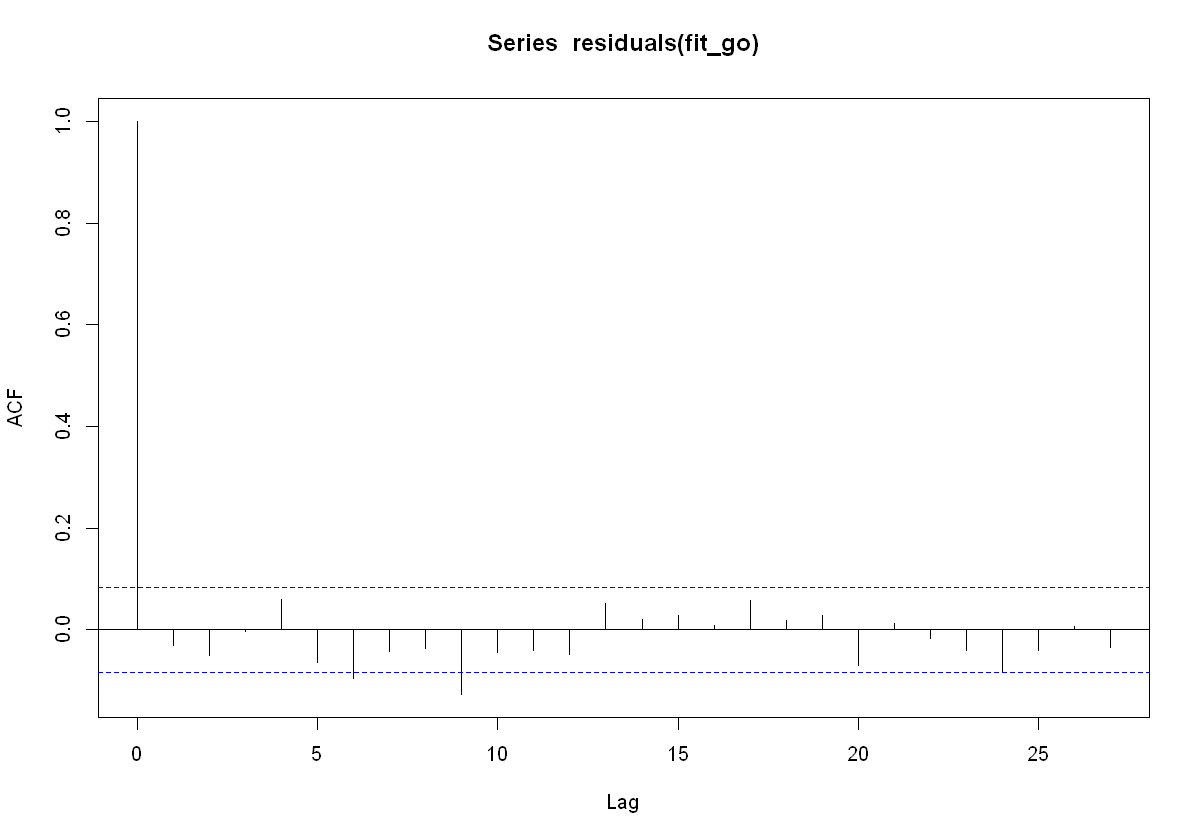

In [675]:
acf(residuals(fit_go))

$$Observación:$$ Se observa que despues de aplicar el ajuste con un lag de una semana, se observa que los residuos se convierten en ruido blanco y por esto podemos decir que obtuvimos un buen ajsute

#### Ejercicio 3
3. Analizar el uso de la función `nls` para hacer una ajuste de *regresión logística* a la serie de poblaciones de Australia entre 1778 y 2005

In [676]:
growth <- c(859, 645, 2056, 2873, 3264, 3514, 3579, 3466, 4100, 4344, 
    4588, 5088, 5217, 5945, 7014, 7238, 7598, 7707, 7910, 8794, 10263, 11560, 
    11566, 11875, 12630, 13957, 14086, 15063, 17553, 21192, 25859, 31472, 33543, 
    35492, 37364, 40632, 48072, 52505, 53882, 56300, 58197, 61934, 70039, 75981, 
    83937, 98095, 105556, 113354, 125120, 134488, 151868, 169939, 190408, 220968, 
    240984, 250848, 264287, 279148, 293249, 308797, 332328, 373362, 405356, 
    437665, 513796, 600992, 694917, 793260, 876729, 970287, 1050828, 1097305, 
    1145585, 1168149, 1206918, 1259292, 1325183, 1390043, 1443955, 1483848, 
    1539552, 1592157, 1647756, 1700888, 1742847, 1794520, 1849392, 1898223, 
    1958679, 2031130, 2092164, 2162343, 2231531, 2306736, 2388082, 2505736, 
    2605725, 2694518, 2788050, 2881362, 2981677, 3062477, 3151355, 3240985, 
    3305753, 3361895, 3426760, 3491621, 3553098, 3617783, 3664715, 3715988, 
    3765339, 3824913, 3875318, 3916592, 3974150, 4032977, 4091485, 4161722, 
    4232278, 4323960, 4425083, 4573786, 4746589, 4893741, 4971778, 4969457, 
    4917949, 4982063, 5080912, 5303574, 5411297, 5510944, 5637286, 5755986, 
    5882002, 6003027, 6124020, 6251016, 6355770, 6436213, 6500751, 6552606, 
    6603785, 6656695, 6707247, 6755662, 6810413, 6871492, 6935909, 7004912, 
    7077586, 7143598, 7201096, 7269658, 7347024, 7430197, 7517981, 7637963, 
    7792465, 8045570, 8307481, 8527907, 8739569, 8902686, 9089936, 9311825, 
    9530871, 9744087, 9947358, 10160968, 10391920, 10642654, 10846059, 11055482, 
    11280429, 11505408, 11704843, 11912253, 12145582, 12407217, 12663469, 13198380, 
    13409288, 13614344, 13831978, 13968881, 14110107, 14281533, 14430830, 14602481, 
    14807370, 15054117, 15288891, 15483496, 15677282, 15900566, 16138769, 16394641, 
    16687082, 16936723, 17169768, 17387023, 17581284, 17759999, 17951481, 18196054, 
    18420320, 18609115, 18814276, 19038338, 19272644, 19533972, 19770963, 20011882, 
    20252132, 20544064)
years <- c(1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 
    1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 
    1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 
    1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 
    1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 
    1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 
    1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 
    1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 
    1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 
    1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 
    1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 
    1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 
    1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 
    1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 
    1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 
    1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 
    1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 
    1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 
    2001, 2002, 2003, 2004, 2005)

population <- data.frame(growth, years)

In [677]:
head(population)

growth,years
859,1788
645,1789
2056,1790
2873,1791
3264,1792
3514,1793


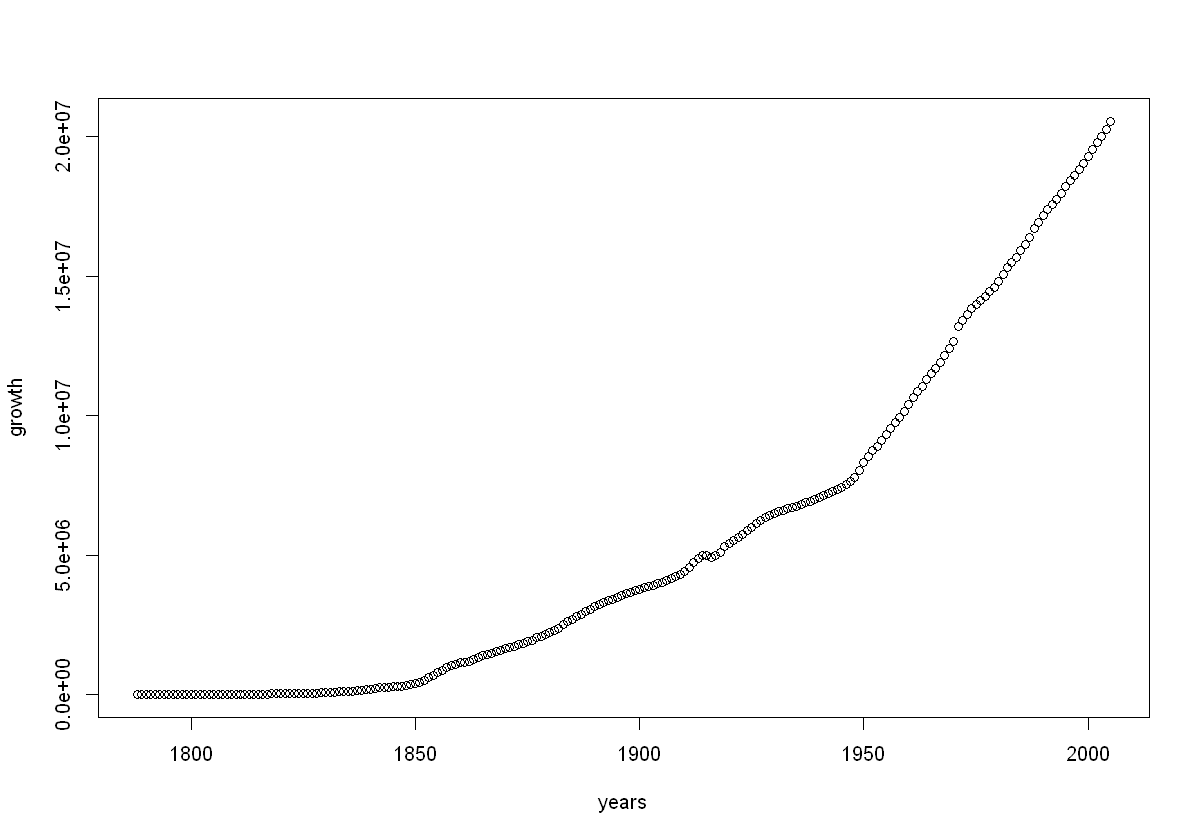

In [678]:
plot(years, growth)

In [703]:
fit_9 = lm(growth ~ 0 + time(growth))
summary(fit_9)


Call:
lm(formula = growth ~ 0 + time(growth))

Residuals:
     Min       1Q   Median       3Q      Max 
-3368385 -2971425 -2044030  -377477  7579706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
time(growth)    59470       1608   36.98   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2999000 on 217 degrees of freedom
Multiple R-squared:  0.863,	Adjusted R-squared:  0.8624 
F-statistic:  1367 on 1 and 217 DF,  p-value: < 2.2e-16


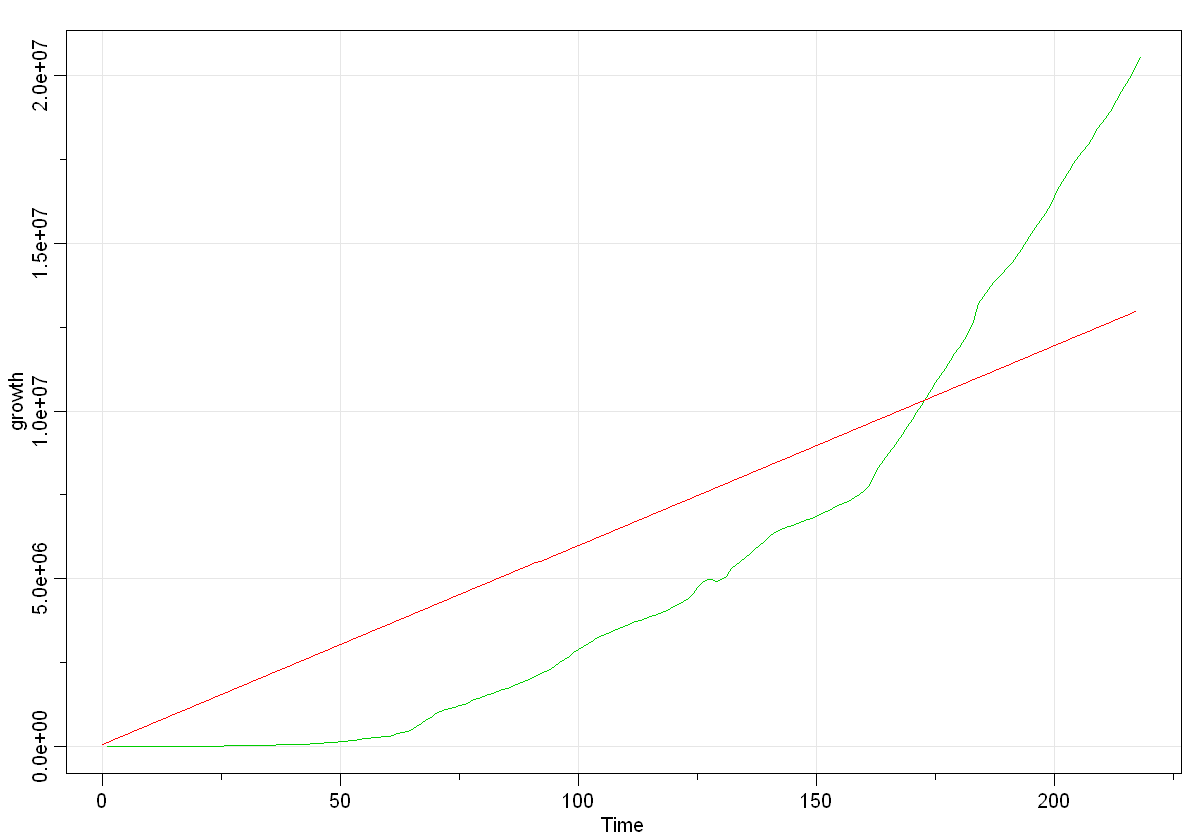

In [717]:
fitted_g = ts(fitted(fit_9), start = 0,)
tsplot(growth, col = 3)
lines(fitted_g, col = 2)

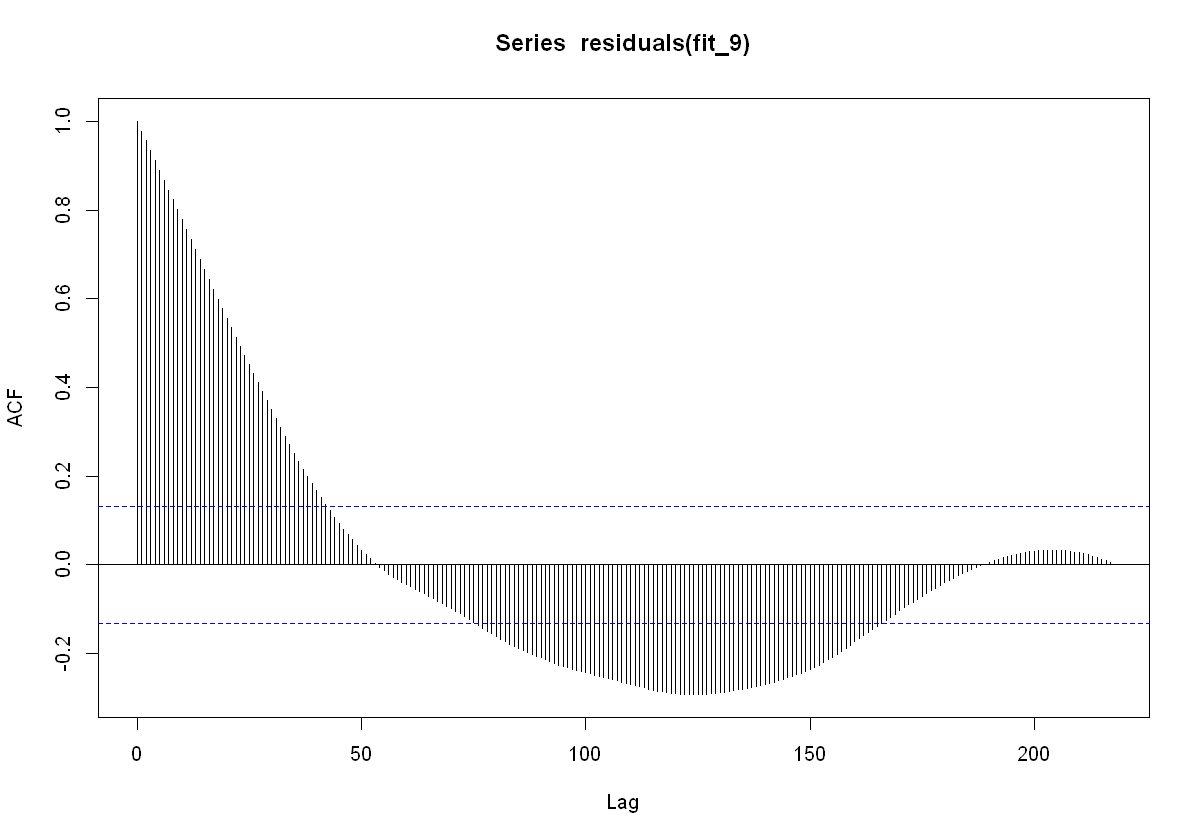

In [701]:
acf(residuals(fit_9), 500)

In [683]:
delta=diff(log(growth))

In [684]:
head(delta)

[1] -0.28651861  1.15926731  0.33459443  0.12759666  0.07380155  0.01832844

Warning message in growth + delta:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"

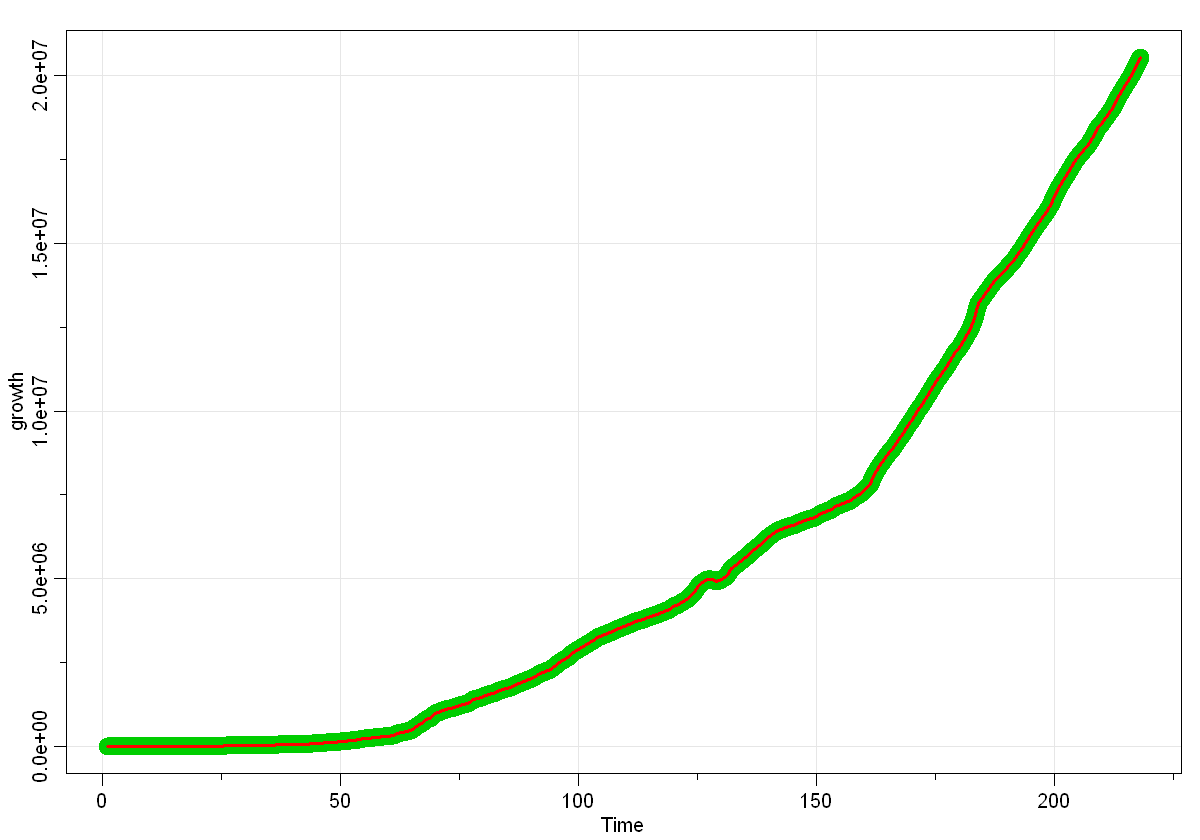

In [751]:
fitted_d = ts( growth + delta)
tsplot(growth, col = 3, lwd = 15)
lines(fitted_d, col = 2, lwd = 3)

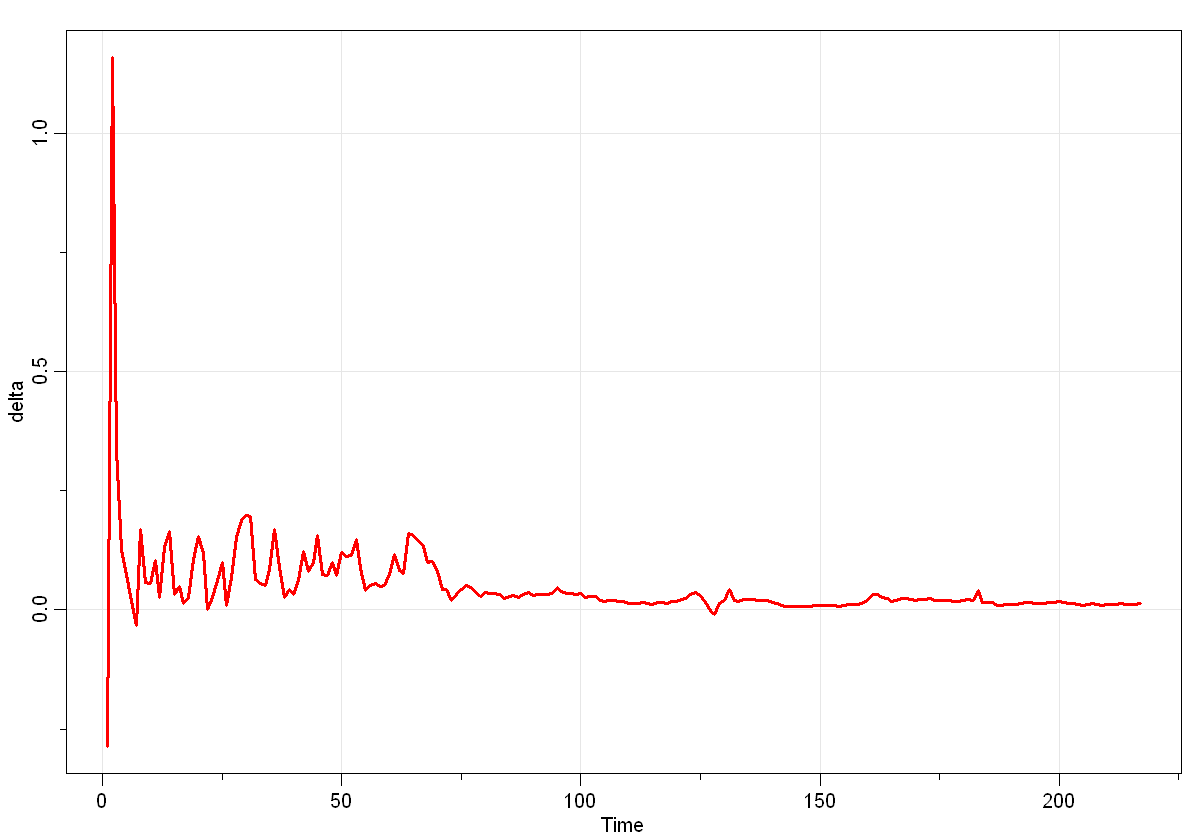

In [761]:
tsplot(delta, col = 2, lwd = 3)

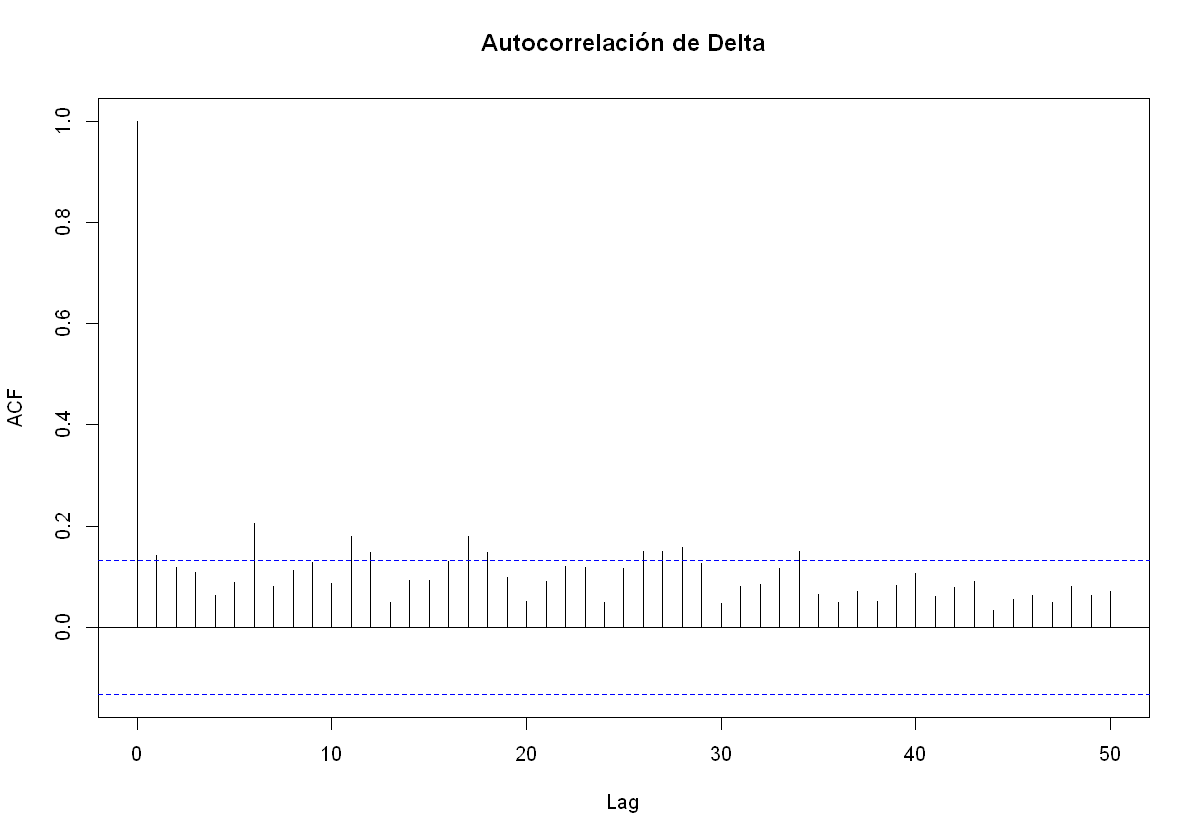

In [753]:
acf(delta, 50, main = "Autocorrelación de Delta")

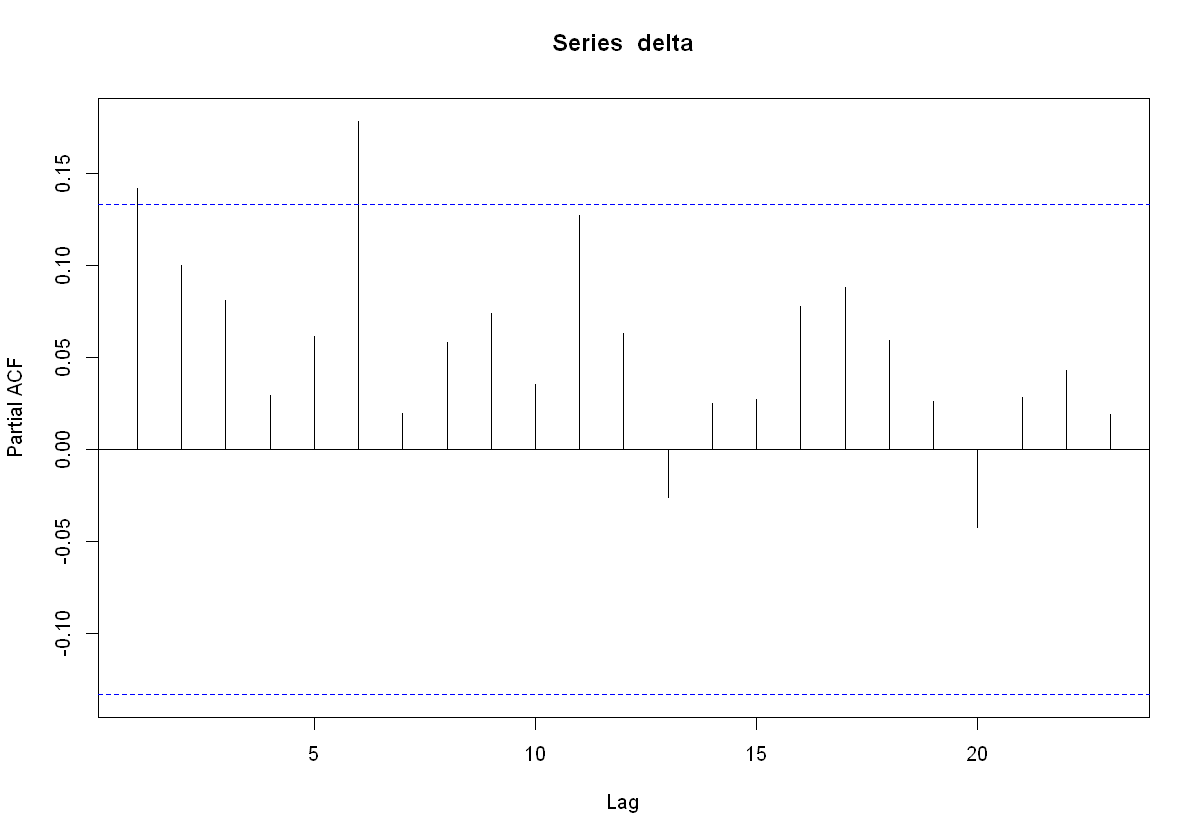

In [754]:
pacf(delta)

In [781]:
fit_10 = lm(delta ~  time(delta) )
summary(fit_10)


Call:
lm(formula = delta ~ time(delta))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39330 -0.02520 -0.00963  0.01475  1.05304 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.073e-01  1.166e-02   9.207  < 2e-16 ***
time(delta) -5.585e-04  9.274e-05  -6.023 7.34e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08557 on 215 degrees of freedom
Multiple R-squared:  0.1444,	Adjusted R-squared:  0.1404 
F-statistic: 36.27 on 1 and 215 DF,  p-value: 7.341e-09


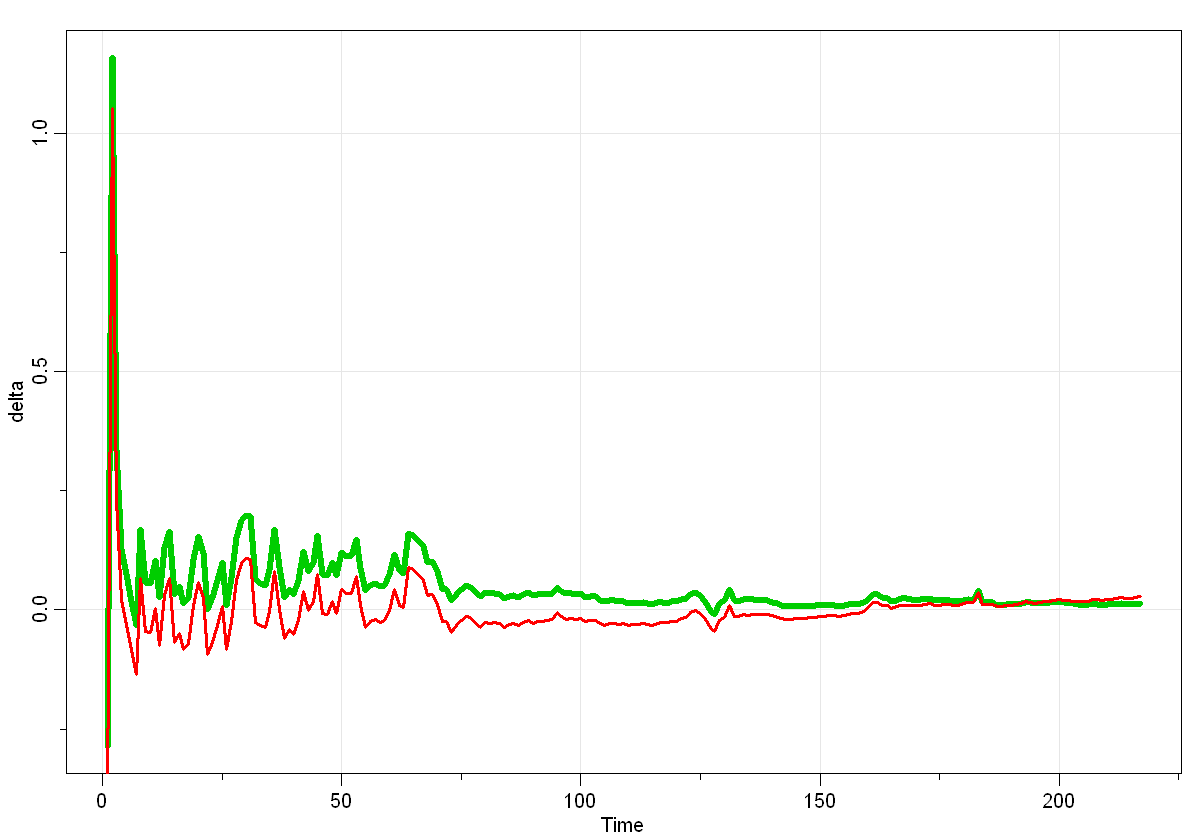

In [782]:
tsplot(delta, col=3, lwd = 5)
lines(residuals(fit_10), col =2, lwd = 3)

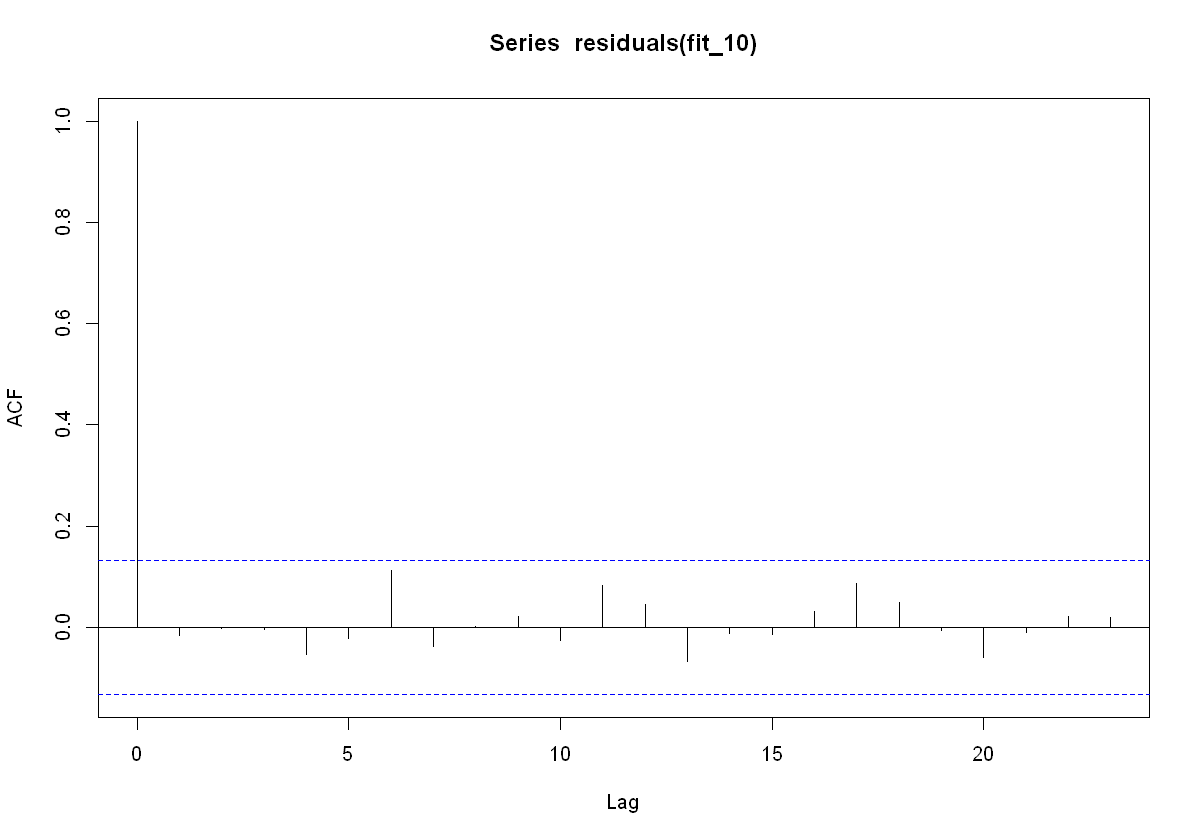

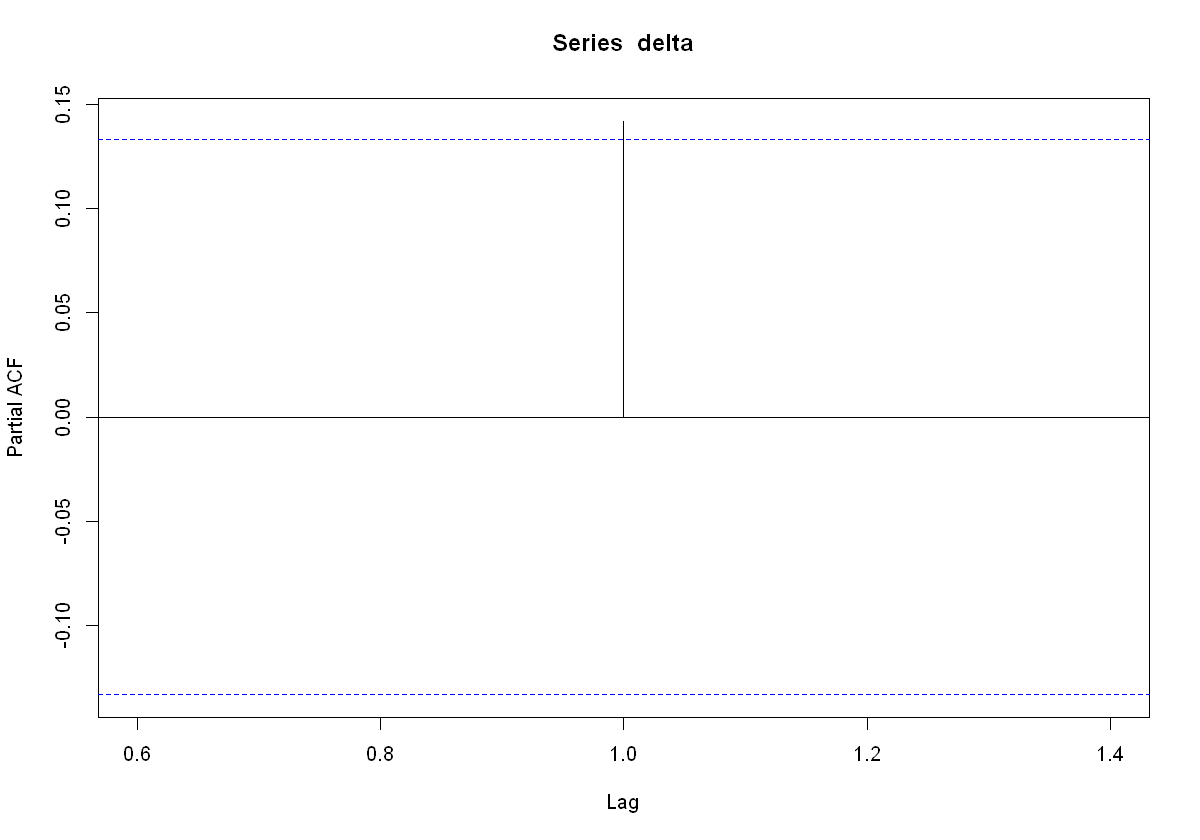

In [783]:
acf(residuals(fit_10))
pacf(delta, time(delta))

In [784]:
#AIC
AIC(fit_9)
AIC(fit_10)

#BIC
BIC(fit_9)
BIC(fit_10)

[1] 7124.049

[1] -447.1227

[1] 7130.818

[1] -436.9831